<a href="https://colab.research.google.com/github/FedorYatsenko/NN_Labs/blob/master/Lab2_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лаб. 2 Федір Яценко
#### Варіант № 17

### Імпорт модулів

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

### Завантаження даних

In [3]:
drive.mount('/content/drive')

path = "/content/drive/My Drive/Colab Notebooks/lab1/"

files = ['sample017.csv', 'sampleCh1.csv', 'sampleCh2.csv', 'sampleCh3.csv']

data = []
for f in files:
  data_f = np.genfromtxt(path + f, delimiter=',')
  data.append(data_f)
  print(f'File "{f}": {data_f.shape}')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
File "sample017.csv": (600, 3)
File "sampleCh1.csv": (2000, 3)
File "sampleCh2.csv": (2000, 3)
File "sampleCh3.csv": (2000, 4)


### Функія для створення моделі

In [0]:
def get_model(shape):
	return Sequential([
    	Dense(1, input_shape=(shape,), activation='sigmoid', use_bias=True),
	])


def get_model2(shape):
	# layers
	inputs = Input((shape,))
	prediction = Dense(1, activation='sigmoid', use_bias=True)(inputs)
	
	# model
	return Model(inputs=inputs, outputs=prediction)


### Витрати та оптимізатори

In [0]:
losses =['binary_crossentropy', 'categorical_hinge', 'huber_loss', 'logcosh',
         'mean_absolute_error', 'mean_absolute_percentage_error',
         'mean_squared_error', 'mean_squared_logarithmic_error', 'poisson',
         'squared_hinge']
# 'categorical_crossentropy', 'sparse_categorical_crossentropy' 

optimizers = ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Ftrl', 'Nadam', 'RMSprop', 'SGD']

### Графіки

In [0]:
def show_results(x_train, y_trian, l, o, epoch, loss, acc, bias, ws, history, d):
  print(f"x_train: {x_train.shape}, y_trian: {y_trian.shape}, loss={l}, optimizer={o}")
  print(f"------> epoch={epoch} loss={loss}, accuracy={acc}")
  print(f"------> bias={bias}, weights={ws}")

  plt.figure(figsize=(12, 3))
  plt.subplot(131)
  plt.plot(history.history['acc'])
  if len(ws) == 2:
    x1 = [x for x, _, g in d if g == 0]
    y1 = [y for _, y, g in d if g == 0]
    x2 = [x for x, _, g in d if g == 1]
    y2 = [y for _, y, g in d if g == 1]

    xs = [-15, 15]
    ys1 = [-(ws[0] / ws[1] * x_) - (bias / ws[1]) for x_ in xs]

    plt.subplot(132)
    plt.plot(x1, y1, 'ro', x2, y2, 'bo', xs, ys1, 'k')
  plt.show()

### Отримання кращої епохи

In [0]:
def get_best_epoch(history):
  loss, acc, epoch = None, 0, 0
  for i, li in enumerate(history.history['loss']):
    if loss is None or li < loss:
      epoch, loss, acc = i + 1, li, history.history['acc'][i]
  return loss, acc, epoch

### Отримання параметрів

In [0]:
def get_params(model):
  weights = model.layers[0].get_weights()
  bias = weights[1][0]
  ws = [w[0] for w in weights[0]]
  return bias, ws

### Навчання моделей

In [0]:
# Калбек для ранньої зупинки
es = EarlyStopping(monitor='loss', patience=5, mode='min', restore_best_weights=True)

# for d in data:
def test(d, epochs=100):
  x_train, y_trian = d[:, :-1], d[:, -1]
  max_acc, max_acc_str = None, ''

  for o in optimizers:
    for l in losses:
      model = get_model(x_train.shape[1])
      model.compile(loss=l, optimizer=o, metrics=['accuracy'])
      history = model.fit(x_train, y_trian, epochs=epochs, verbose=0, callbacks=[es])
      
      loss, acc, epoch = get_best_epoch(history) 
      if max_acc is None or acc > max_acc:
        max_acc = acc
        max_acc_str = f"loss={l}, optimizer={o} is best(epoch={epoch}, loss={loss}, accuracy={acc})"
      
      bias, ws = get_params(model)

      show_results(x_train, y_trian, l, o, epoch, loss, acc, bias, ws, history, d)

  print(f"\n\n{max_acc_str}\n-------------------------------------------\n\n\n\n")


### Файл 1

x_train: (600, 2), y_trian: (600,), loss=binary_crossentropy, optimizer=Adadelta
------> epoch=30 loss=2.9172592973709106, accuracy=0.6083333492279053
------> bias=0.00020778531325049698, weights=[1.2062602, 0.6212217]


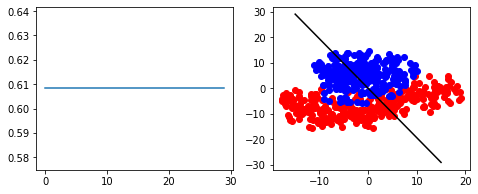

x_train: (600, 2), y_trian: (600,), loss=categorical_hinge, optimizer=Adadelta
------> epoch=30 loss=0.9640478467941285, accuracy=0.528333306312561
------> bias=0.0005795223987661302, weights=[1.1046981, 0.31361526]


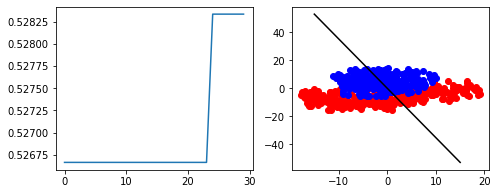

x_train: (600, 2), y_trian: (600,), loss=huber_loss, optimizer=Adadelta
------> epoch=30 loss=0.41277020653088886, accuracy=0.09333333373069763
------> bias=2.753307853708975e-05, weights=[0.163003, -0.69622827]


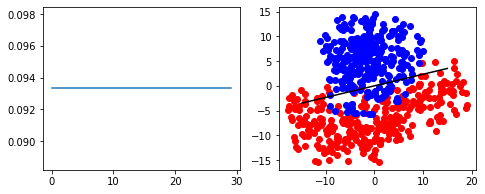

x_train: (600, 2), y_trian: (600,), loss=logcosh, optimizer=Adadelta
------> epoch=30 loss=0.31950464844703674, accuracy=0.21166667342185974
------> bias=0.00020607556507457048, weights=[0.6554737, -0.612903]


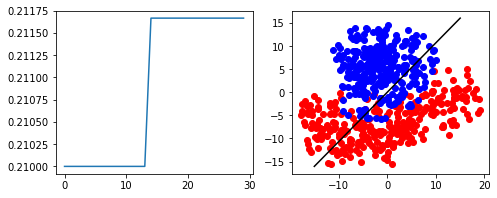

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_error, optimizer=Adadelta
------> epoch=30 loss=0.7303735280036926, accuracy=0.2316666692495346
------> bias=0.0003313951310701668, weights=[0.38639143, -0.2998486]


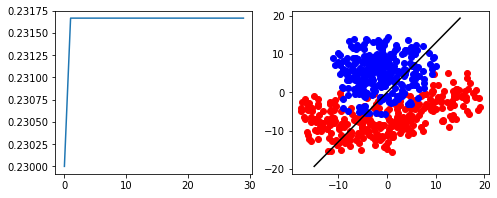

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_percentage_error, optimizer=Adadelta
------> epoch=30 loss=199283136.21333334, accuracy=0.6800000071525574
------> bias=-0.0007816567085683346, weights=[-1.1056315, 0.47320646]


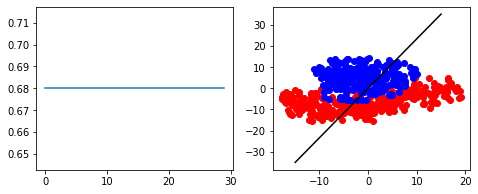

x_train: (600, 2), y_trian: (600,), loss=mean_squared_error, optimizer=Adadelta
------> epoch=30 loss=0.6198914440472921, accuracy=0.28999999165534973
------> bias=0.0006559668108820915, weights=[-0.39662114, -0.43449473]


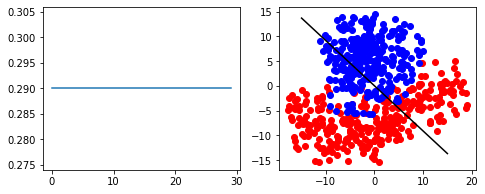

x_train: (600, 2), y_trian: (600,), loss=mean_squared_logarithmic_error, optimizer=Adadelta
------> epoch=30 loss=0.054344893594582874, accuracy=0.8366666436195374
------> bias=-4.575438651954755e-05, weights=[0.12823753, 0.5721556]


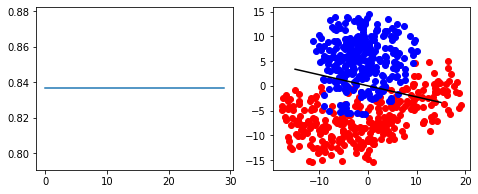

x_train: (600, 2), y_trian: (600,), loss=poisson, optimizer=Adadelta
------> epoch=30 loss=0.7704332081476847, accuracy=0.8433333039283752
------> bias=0.0005753286532126367, weights=[-0.90064096, 1.3131208]


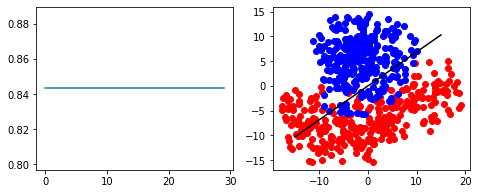

x_train: (600, 2), y_trian: (600,), loss=squared_hinge, optimizer=Adadelta
------> epoch=30 loss=1.1544563531875611, accuracy=0.6299999952316284
------> bias=-0.00021017924882471561, weights=[0.5863203, 0.36132756]


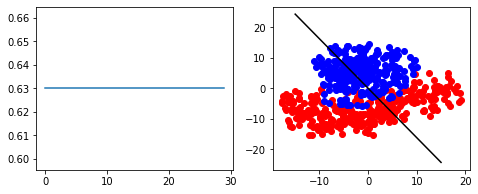

x_train: (600, 2), y_trian: (600,), loss=binary_crossentropy, optimizer=Adagrad
------> epoch=30 loss=1.2124365739027658, accuracy=0.7633333206176758
------> bias=-0.0251441840082407, weights=[-0.9177868, 0.69216716]


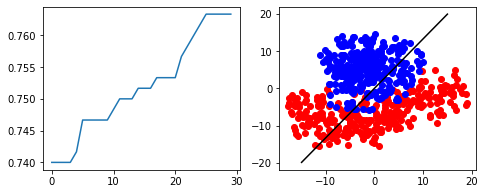

x_train: (600, 2), y_trian: (600,), loss=categorical_hinge, optimizer=Adagrad
------> epoch=30 loss=0.7006235734621684, accuracy=0.8033333420753479
------> bias=0.01959807239472866, weights=[-0.8146875, 0.87230504]


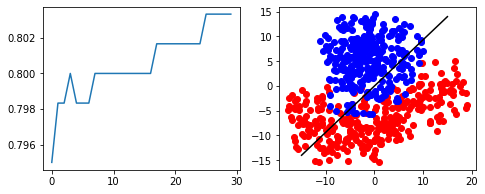

x_train: (600, 2), y_trian: (600,), loss=huber_loss, optimizer=Adagrad
------> epoch=30 loss=0.33049274603525797, accuracy=0.2750000059604645
------> bias=0.039326734840869904, weights=[-0.5604743, -0.66658705]


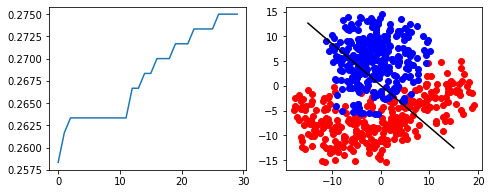

x_train: (600, 2), y_trian: (600,), loss=logcosh, optimizer=Adagrad
------> epoch=30 loss=0.03160311962167422, accuracy=0.9166666865348816
------> bias=0.01429797988384962, weights=[-0.048694782, 0.72238195]


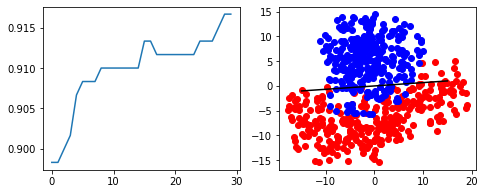

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_error, optimizer=Adagrad
------> epoch=30 loss=0.4818900219599406, accuracy=0.5116666555404663
------> bias=0.03897833079099655, weights=[0.52801967, 0.114474565]


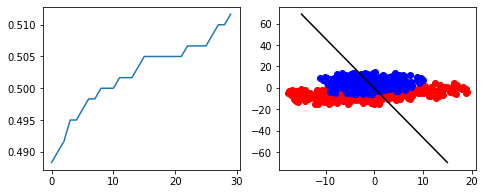

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_percentage_error, optimizer=Adagrad
------> epoch=30 loss=183436213.12, accuracy=0.6066666841506958
------> bias=-0.043048959225416183, weights=[0.47157595, 0.2453963]


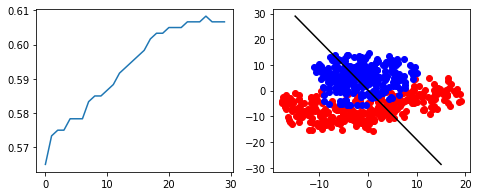

x_train: (600, 2), y_trian: (600,), loss=mean_squared_error, optimizer=Adagrad
------> epoch=30 loss=0.7148799236615498, accuracy=0.18000000715255737
------> bias=0.03246514871716499, weights=[-0.17438044, -0.5184207]


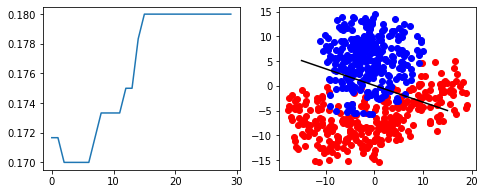

x_train: (600, 2), y_trian: (600,), loss=mean_squared_logarithmic_error, optimizer=Adagrad
------> epoch=30 loss=0.10422693649927775, accuracy=0.7333333492279053
------> bias=0.035138729959726334, weights=[0.5036908, 0.6197803]


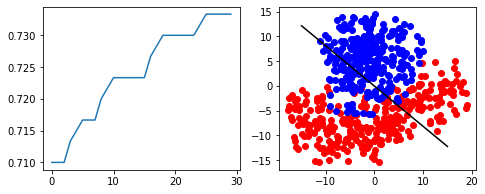

x_train: (600, 2), y_trian: (600,), loss=poisson, optimizer=Adagrad
------> epoch=30 loss=0.9370405125617981, accuracy=0.7883333563804626
------> bias=0.039659060537815094, weights=[0.6671582, 1.2990047]


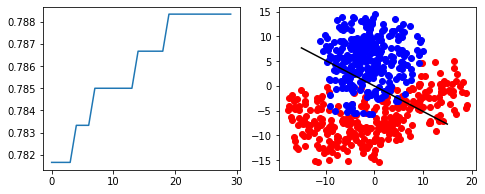

x_train: (600, 2), y_trian: (600,), loss=squared_hinge, optimizer=Adagrad
------> epoch=30 loss=1.1188398917516074, accuracy=0.7149999737739563
------> bias=-0.03209533914923668, weights=[-1.2871778, 0.7155433]


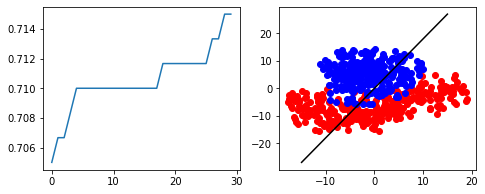

x_train: (600, 2), y_trian: (600,), loss=binary_crossentropy, optimizer=Adam
------> epoch=30 loss=0.22102356950441995, accuracy=0.9100000262260437
------> bias=0.18235142529010773, weights=[-0.19137183, 0.810877]


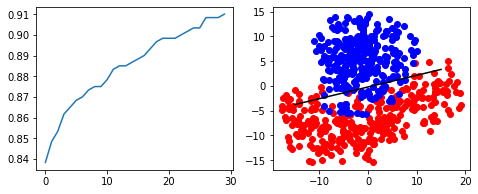

x_train: (600, 2), y_trian: (600,), loss=categorical_hinge, optimizer=Adam
------> epoch=30 loss=0.7414113434155782, accuracy=0.7749999761581421
------> bias=0.3379520773887634, weights=[-0.50441134, 0.45517695]


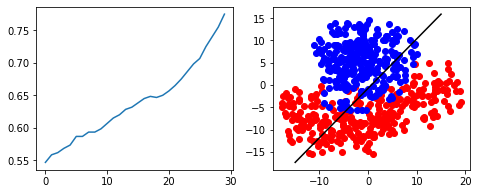

x_train: (600, 2), y_trian: (600,), loss=huber_loss, optimizer=Adam
------> epoch=30 loss=0.05354916234811147, accuracy=0.8583333492279053
------> bias=0.14391560852527618, weights=[-0.43735188, 0.7822365]


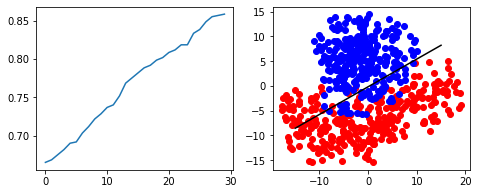

x_train: (600, 2), y_trian: (600,), loss=logcosh, optimizer=Adam
------> epoch=30 loss=0.0967378235856692, accuracy=0.753333330154419
------> bias=0.37859591841697693, weights=[0.86213803, 1.259249]


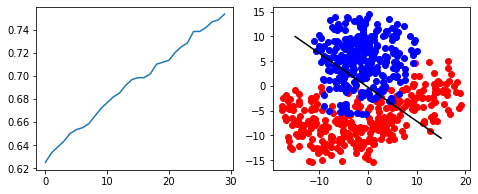

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_error, optimizer=Adam
------> epoch=30 loss=0.13261256009340286, accuracy=0.8700000047683716
------> bias=0.13808417320251465, weights=[-0.813576, 1.5965874]


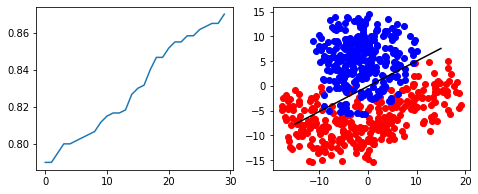

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_percentage_error, optimizer=Adam
------> epoch=30 loss=60605431.12, accuracy=0.8999999761581421
------> bias=-0.45921725034713745, weights=[-0.051652253, 0.32690287]


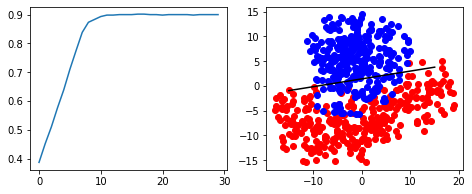

x_train: (600, 2), y_trian: (600,), loss=mean_squared_error, optimizer=Adam
------> epoch=30 loss=0.06633340721329054, accuracy=0.9100000262260437
------> bias=0.16935880482196808, weights=[-0.13075243, 0.89624536]


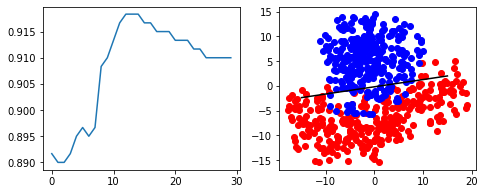

x_train: (600, 2), y_trian: (600,), loss=mean_squared_logarithmic_error, optimizer=Adam
------> epoch=30 loss=0.2768148839473724, accuracy=0.3700000047683716
------> bias=0.3773113191127777, weights=[1.3365041, -0.23306832]


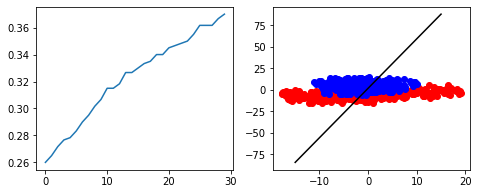

x_train: (600, 2), y_trian: (600,), loss=poisson, optimizer=Adam
------> epoch=30 loss=0.8402844444910685, accuracy=0.7599999904632568
------> bias=0.4234083890914917, weights=[0.537585, 0.8085427]


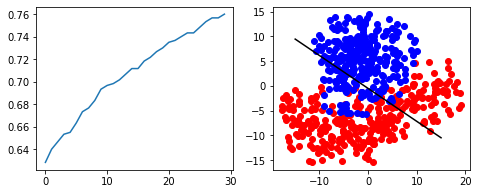

x_train: (600, 2), y_trian: (600,), loss=squared_hinge, optimizer=Adam
------> epoch=30 loss=0.6265264185269673, accuracy=0.9066666960716248
------> bias=-0.3803766965866089, weights=[-0.10776612, 0.98272455]


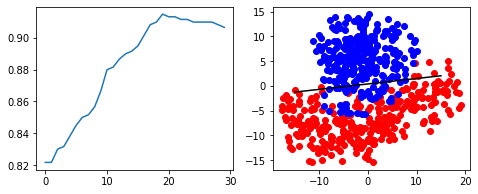

x_train: (600, 2), y_trian: (600,), loss=binary_crossentropy, optimizer=Adamax
------> epoch=30 loss=0.5577269549792011, accuracy=0.871666669845581
------> bias=0.004423732403665781, weights=[-0.7749814, 1.5383301]


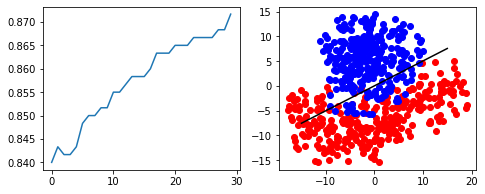

x_train: (600, 2), y_trian: (600,), loss=categorical_hinge, optimizer=Adamax
------> epoch=30 loss=0.6509164619445801, accuracy=0.9100000262260437
------> bias=0.03278312459588051, weights=[-0.107742645, 0.46631008]


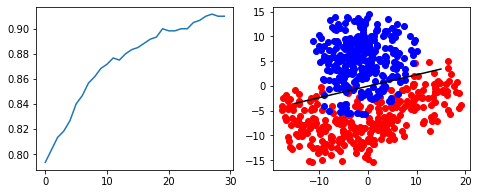

x_train: (600, 2), y_trian: (600,), loss=huber_loss, optimizer=Adamax
------> epoch=30 loss=0.0738070921599865, accuracy=0.8166666626930237
------> bias=0.047176286578178406, weights=[-0.6255391, 0.7589413]


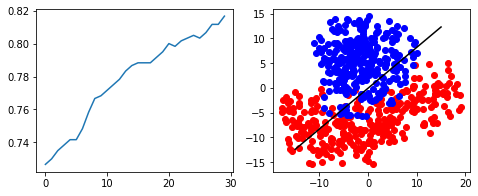

x_train: (600, 2), y_trian: (600,), loss=logcosh, optimizer=Adamax
------> epoch=30 loss=0.06966848878810804, accuracy=0.8233333230018616
------> bias=0.09129433333873749, weights=[0.47596008, 1.4311258]


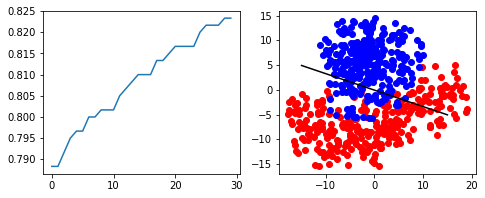

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_error, optimizer=Adamax
------> epoch=30 loss=0.2665841213862101, accuracy=0.7416666746139526
------> bias=0.18045608699321747, weights=[1.0963753, 1.4194952]


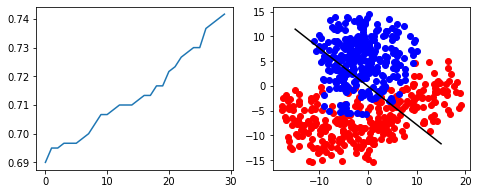

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_percentage_error, optimizer=Adamax
------> epoch=30 loss=191053183.89333335, accuracy=0.6133333444595337
------> bias=-0.38681328296661377, weights=[-0.12559043, 0.05185835]


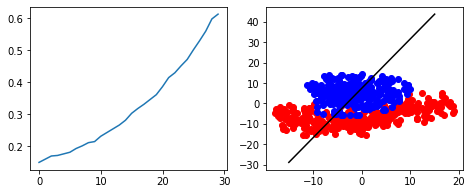

x_train: (600, 2), y_trian: (600,), loss=mean_squared_error, optimizer=Adamax
------> epoch=30 loss=0.4272254423300425, accuracy=0.5199999809265137
------> bias=0.18033871054649353, weights=[-1.1785191, -0.12571658]


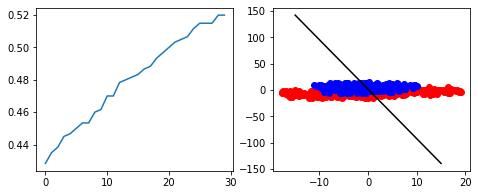

x_train: (600, 2), y_trian: (600,), loss=mean_squared_logarithmic_error, optimizer=Adamax
------> epoch=30 loss=0.3613910241921743, accuracy=0.1733333319425583
------> bias=0.11599287390708923, weights=[0.41872406, -0.5605943]


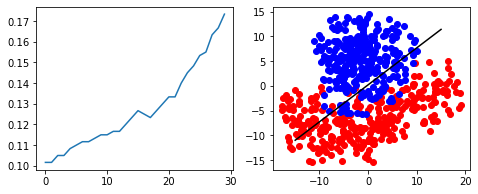

x_train: (600, 2), y_trian: (600,), loss=poisson, optimizer=Adamax
------> epoch=30 loss=0.8002121639251709, accuracy=0.6650000214576721
------> bias=0.2568250894546509, weights=[0.2747755, 0.19454171]


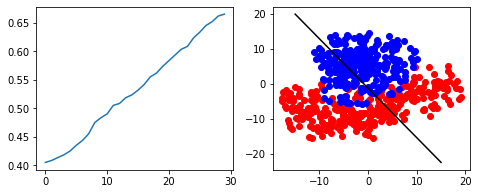

x_train: (600, 2), y_trian: (600,), loss=squared_hinge, optimizer=Adamax
------> epoch=30 loss=1.5102255471547446, accuracy=0.4983333349227905
------> bias=-0.04517515376210213, weights=[-0.9615457, -0.16490957]


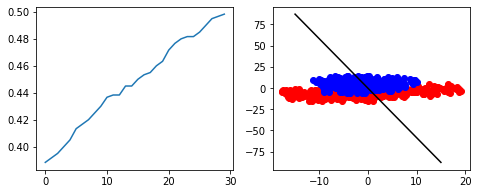

x_train: (600, 2), y_trian: (600,), loss=binary_crossentropy, optimizer=Ftrl
------> epoch=30 loss=1.8576996930440266, accuracy=0.10499999672174454
------> bias=-0.007151496130973101, weights=[0.0009917299, -0.27015775]


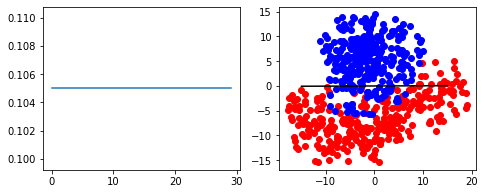

x_train: (600, 2), y_trian: (600,), loss=categorical_hinge, optimizer=Ftrl
------> epoch=30 loss=0.945713308652242, accuracy=0.8050000071525574
------> bias=0.0007264238083735108, weights=[-0.032812536, 0.03552959]


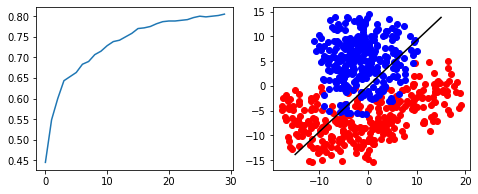

x_train: (600, 2), y_trian: (600,), loss=huber_loss, optimizer=Ftrl
------> epoch=30 loss=0.08169542819261551, accuracy=0.8816666603088379
------> bias=0.004673190880566835, weights=[0.0050394274, 0.07635979]


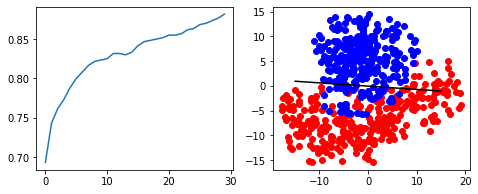

x_train: (600, 2), y_trian: (600,), loss=logcosh, optimizer=Ftrl
------> epoch=30 loss=0.08700960924228032, accuracy=0.8399999737739563
------> bias=0.0048897843807935715, weights=[0.012433246, 0.060778953]


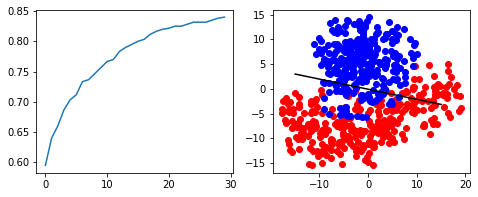

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_error, optimizer=Ftrl
------> epoch=30 loss=0.522850824991862, accuracy=0.4816666543483734
------> bias=0.019967490807175636, weights=[-0.12875034, -0.033236664]


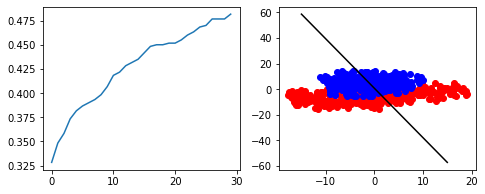

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_percentage_error, optimizer=Ftrl
------> epoch=30 loss=51764428.666666664, accuracy=0.8849999904632568
------> bias=-0.04130953922867775, weights=[0.09874691, 1.3890156]


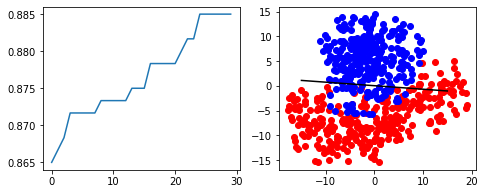

x_train: (600, 2), y_trian: (600,), loss=mean_squared_error, optimizer=Ftrl
------> epoch=30 loss=0.3313927225271861, accuracy=0.23333333432674408
------> bias=0.001540674245916307, weights=[-0.030421266, -0.051899]


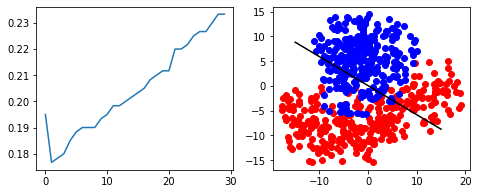

x_train: (600, 2), y_trian: (600,), loss=mean_squared_logarithmic_error, optimizer=Ftrl
------> epoch=30 loss=0.09026054014762243, accuracy=0.9116666913032532
------> bias=-0.021764226257801056, weights=[-0.0026834393, 0.05563956]


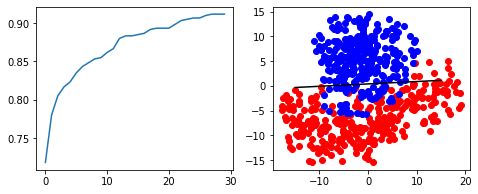

x_train: (600, 2), y_trian: (600,), loss=poisson, optimizer=Ftrl
------> epoch=30 loss=3.337739038467407, accuracy=0.16333332657814026
------> bias=0.04484936594963074, weights=[-0.24192186, -1.0635442]


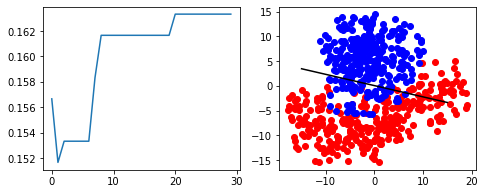

x_train: (600, 2), y_trian: (600,), loss=squared_hinge, optimizer=Ftrl
------> epoch=30 loss=1.7572071107228597, accuracy=0.3016666769981384
------> bias=-0.015439067035913467, weights=[-0.32867065, -0.31357172]


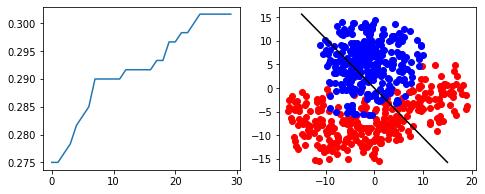

x_train: (600, 2), y_trian: (600,), loss=binary_crossentropy, optimizer=Nadam
------> epoch=30 loss=4.044276161193848, accuracy=0.11500000208616257
------> bias=-0.03902310132980347, weights=[0.24924715, -0.6223122]


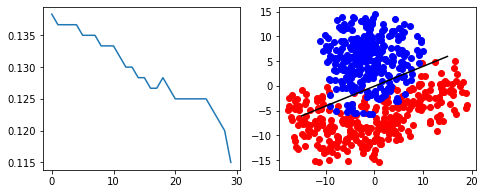

x_train: (600, 2), y_trian: (600,), loss=categorical_hinge, optimizer=Nadam
------> epoch=30 loss=0.6718748982747396, accuracy=0.8600000143051147
------> bias=0.3784887492656708, weights=[0.07926527, 0.56434387]


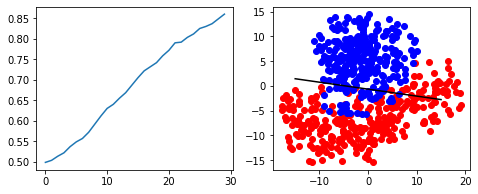

x_train: (600, 2), y_trian: (600,), loss=huber_loss, optimizer=Nadam
------> epoch=30 loss=0.30004616379737853, accuracy=0.3616666793823242
------> bias=0.3368295133113861, weights=[1.6577519, -0.33276063]


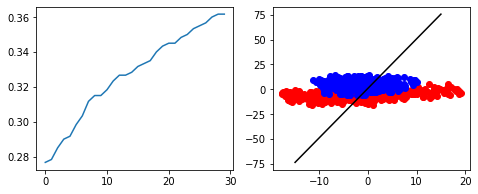

x_train: (600, 2), y_trian: (600,), loss=logcosh, optimizer=Nadam
------> epoch=30 loss=0.12207313358783722, accuracy=0.6633333563804626
------> bias=0.35534629225730896, weights=[-0.45139307, 0.15027782]


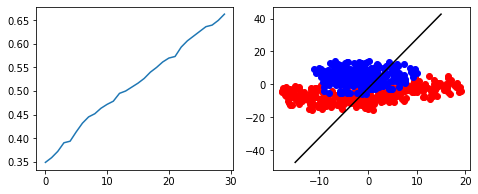

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_error, optimizer=Nadam
------> epoch=30 loss=0.5628575984636942, accuracy=0.42500001192092896
------> bias=0.3999045491218567, weights=[1.4454825, 0.00048303115]


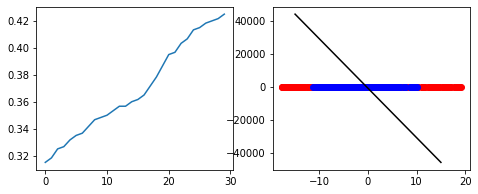

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_percentage_error, optimizer=Nadam
------> epoch=30 loss=225630584.10666665, accuracy=0.4516666531562805
------> bias=-0.4869399666786194, weights=[1.4242097, 0.11933887]


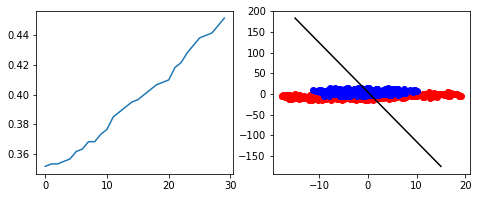

x_train: (600, 2), y_trian: (600,), loss=mean_squared_error, optimizer=Nadam
------> epoch=30 loss=0.06481264710426331, accuracy=0.9100000262260437
------> bias=0.16780216991901398, weights=[-0.11270135, 0.70335925]


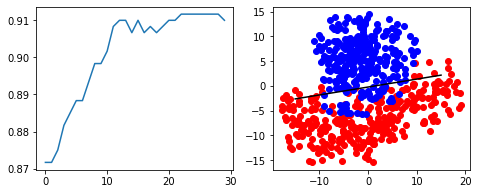

x_train: (600, 2), y_trian: (600,), loss=mean_squared_logarithmic_error, optimizer=Nadam
------> epoch=30 loss=0.300540345509847, accuracy=0.3449999988079071
------> bias=0.25827041268348694, weights=[1.746721, -0.526535]


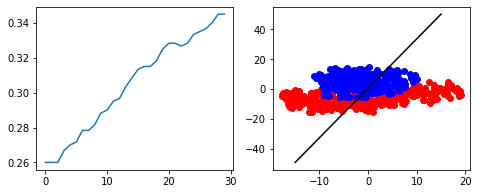

x_train: (600, 2), y_trian: (600,), loss=poisson, optimizer=Nadam
------> epoch=30 loss=0.6134642926851909, accuracy=0.9150000214576721
------> bias=0.24933043122291565, weights=[-0.0896604, 0.5863308]


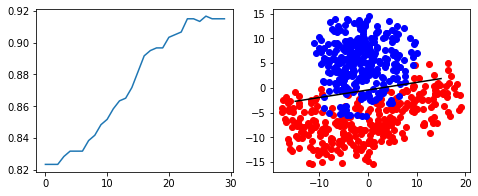

x_train: (600, 2), y_trian: (600,), loss=squared_hinge, optimizer=Nadam
------> epoch=30 loss=0.6420374425252279, accuracy=0.9083333611488342
------> bias=-0.406016081571579, weights=[-0.090689495, 0.6283752]


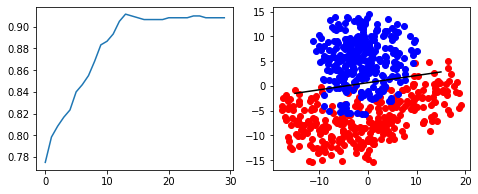

x_train: (600, 2), y_trian: (600,), loss=binary_crossentropy, optimizer=RMSprop
------> epoch=30 loss=1.8272081565856935, accuracy=0.125
------> bias=-0.0388098768889904, weights=[-0.019826813, -0.25434163]


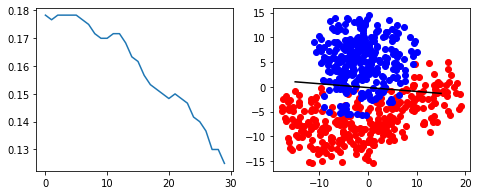

x_train: (600, 2), y_trian: (600,), loss=categorical_hinge, optimizer=RMSprop
------> epoch=30 loss=1.0670963446299235, accuracy=0.4399999976158142
------> bias=0.40163561701774597, weights=[-1.9164621, -0.7609243]


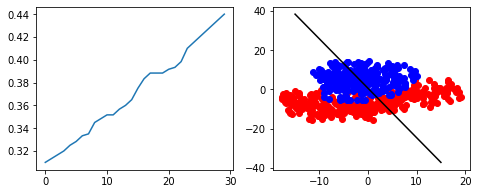

x_train: (600, 2), y_trian: (600,), loss=huber_loss, optimizer=RMSprop
------> epoch=30 loss=0.032280929187933606, accuracy=0.9100000262260437
------> bias=0.15447358787059784, weights=[-0.096033916, 0.6485571]


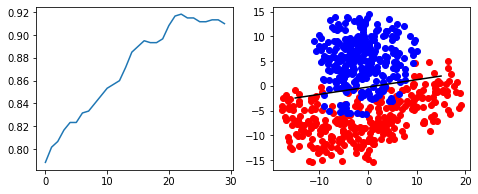

x_train: (600, 2), y_trian: (600,), loss=logcosh, optimizer=RMSprop
------> epoch=30 loss=0.062498527665932974, accuracy=0.8483333587646484
------> bias=0.24543888866901398, weights=[-0.08416627, 0.14673011]


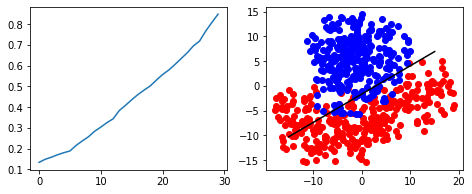

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_error, optimizer=RMSprop
------> epoch=30 loss=0.6311541676521302, accuracy=0.3616666793823242
------> bias=0.22889938950538635, weights=[1.8492947, -0.38352194]


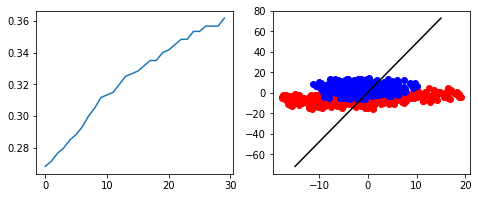

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_percentage_error, optimizer=RMSprop
------> epoch=30 loss=112260426.08, accuracy=0.7816666960716248
------> bias=-0.46449777483940125, weights=[0.717957, 1.4461896]


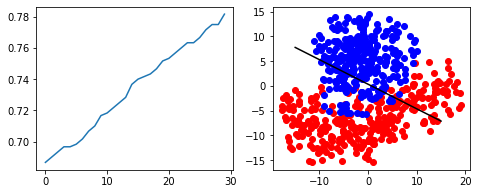

x_train: (600, 2), y_trian: (600,), loss=mean_squared_error, optimizer=RMSprop
------> epoch=30 loss=0.1910132074356079, accuracy=0.7916666865348816
------> bias=0.3472297191619873, weights=[0.9228914, 1.8622012]


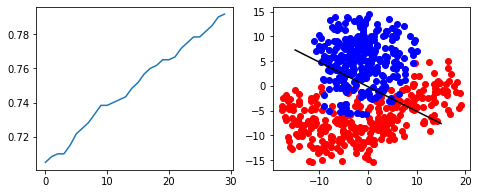

x_train: (600, 2), y_trian: (600,), loss=mean_squared_logarithmic_error, optimizer=RMSprop
------> epoch=30 loss=0.06038530786832174, accuracy=0.8349999785423279
------> bias=0.2680272161960602, weights=[0.21500361, 0.9723708]


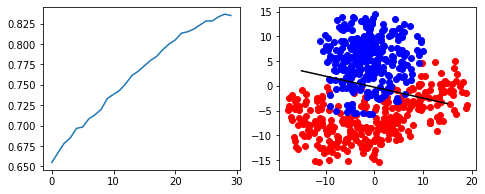

x_train: (600, 2), y_trian: (600,), loss=poisson, optimizer=RMSprop
------> epoch=30 loss=2.796550687154134, accuracy=0.11999999731779099
------> bias=0.564331591129303, weights=[0.3449653, -0.781811]


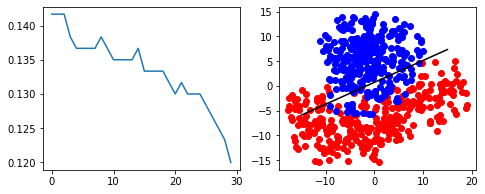

x_train: (600, 2), y_trian: (600,), loss=squared_hinge, optimizer=RMSprop
------> epoch=30 loss=0.8246712787946066, accuracy=0.824999988079071
------> bias=-0.24824199080467224, weights=[0.4881522, 1.7870708]


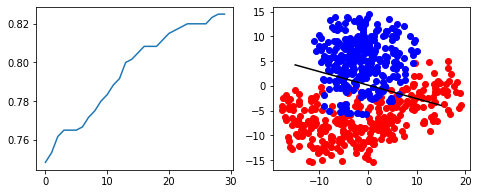

x_train: (600, 2), y_trian: (600,), loss=binary_crossentropy, optimizer=SGD
------> epoch=30 loss=0.20919705152511597, accuracy=0.9083333611488342
------> bias=0.1434897482395172, weights=[-0.11760999, 0.6071325]


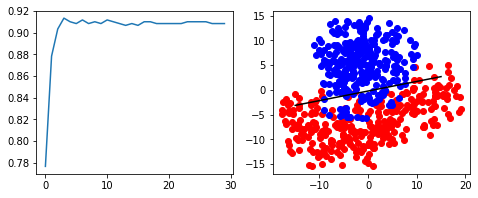

x_train: (600, 2), y_trian: (600,), loss=categorical_hinge, optimizer=SGD
------> epoch=30 loss=0.7635084462165832, accuracy=0.7350000143051147
------> bias=0.05924008786678314, weights=[-1.174307, 0.8074217]


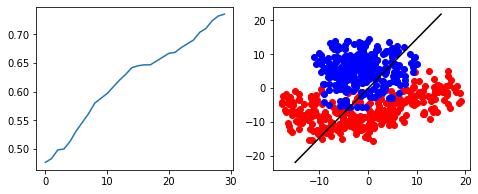

x_train: (600, 2), y_trian: (600,), loss=huber_loss, optimizer=SGD
------> epoch=30 loss=0.1055151371161143, accuracy=0.7649999856948853
------> bias=0.03840621933341026, weights=[0.7986246, 1.2825181]


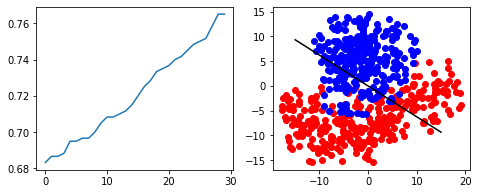

x_train: (600, 2), y_trian: (600,), loss=logcosh, optimizer=SGD
------> epoch=30 loss=0.19660240153471628, accuracy=0.5116666555404663
------> bias=0.039339832961559296, weights=[-1.482118, -0.19557501]


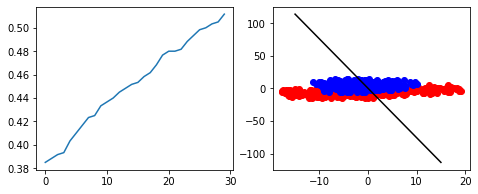

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_error, optimizer=SGD
------> epoch=30 loss=0.6322809664408365, accuracy=0.3566666543483734
------> bias=0.02536190114915371, weights=[1.4287655, -0.2938714]


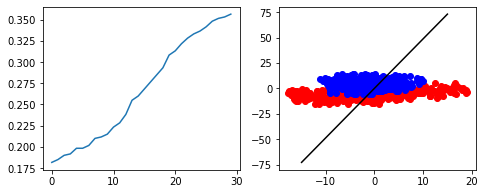

x_train: (600, 2), y_trian: (600,), loss=mean_absolute_percentage_error, optimizer=SGD
------> epoch=3 loss=76666674.41333333, accuracy=0.8399999737739563
------> bias=-276497.9375, weights=[537316.94, 2499864.0]


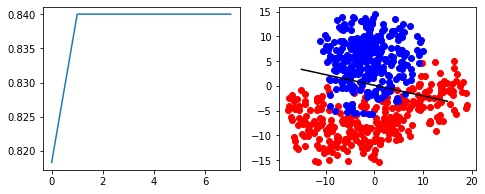

x_train: (600, 2), y_trian: (600,), loss=mean_squared_error, optimizer=SGD
------> epoch=30 loss=0.21447494486967722, accuracy=0.7483333349227905
------> bias=0.10157012194395065, weights=[0.59660035, 0.8888107]


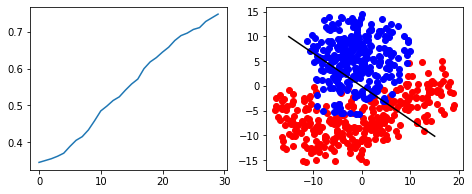

x_train: (600, 2), y_trian: (600,), loss=mean_squared_logarithmic_error, optimizer=SGD
------> epoch=30 loss=0.09800508886575698, accuracy=0.7366666793823242
------> bias=0.06483641266822815, weights=[0.36018717, 0.4791256]


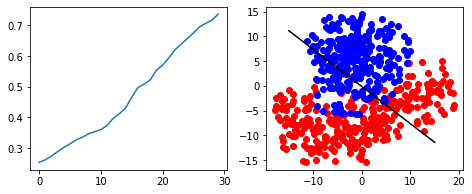

x_train: (600, 2), y_trian: (600,), loss=poisson, optimizer=SGD
------> epoch=30 loss=0.6132358010609945, accuracy=0.9100000262260437
------> bias=0.020446086302399635, weights=[-0.10809777, 0.50600755]


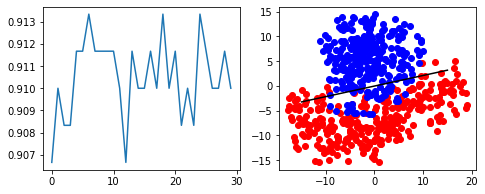

x_train: (600, 2), y_trian: (600,), loss=squared_hinge, optimizer=SGD
------> epoch=30 loss=0.6316881696383159, accuracy=0.9133333563804626
------> bias=-0.25744980573654175, weights=[-0.13249828, 0.8710378]


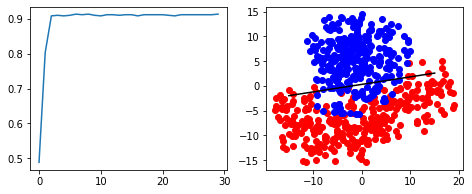



loss=logcosh, optimizer=Adagrad is best(epoch=30, loss=0.03160311962167422, accuracy=0.9166666865348816)
-------------------------------------------






In [0]:
test(data[0], epochs=30)

### Файл 2

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=Adadelta
------> epoch=100 loss=1.5897294173240661, accuracy=0.5860000252723694
------> bias=-0.017814118415117264, weights=[0.9206673, -0.6666477]


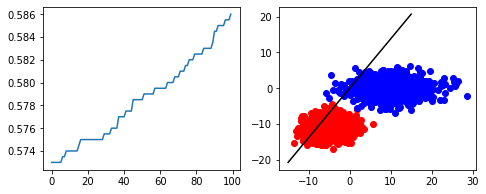

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=Adadelta
------> epoch=100 loss=1.0308362646102904, accuracy=0.4779999852180481
------> bias=-0.006299187894910574, weights=[-1.0952256, 1.0068927]


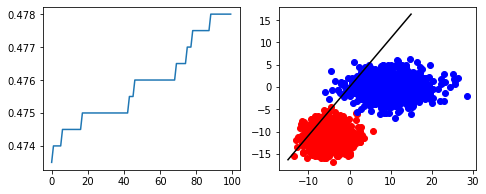

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=Adadelta
------> epoch=100 loss=0.2450594322681427, accuracy=0.49549999833106995
------> bias=-0.0002543579612392932, weights=[-1.2283055, 1.2735897]


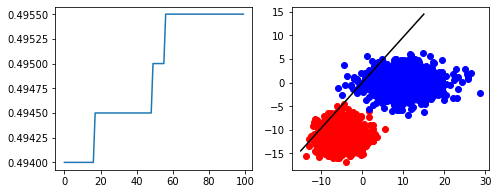

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=Adadelta
------> epoch=100 loss=0.20407616996765138, accuracy=0.5174999833106995
------> bias=0.005165402777493, weights=[-1.0122235, 1.4143051]


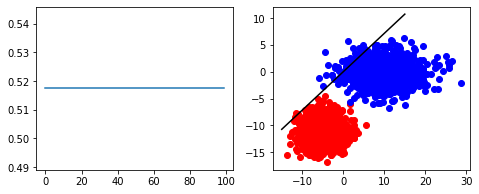

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=Adadelta
------> epoch=100 loss=0.03751807974278927, accuracy=0.968999981880188
------> bias=0.008093402720987797, weights=[0.68635535, 1.2700526]


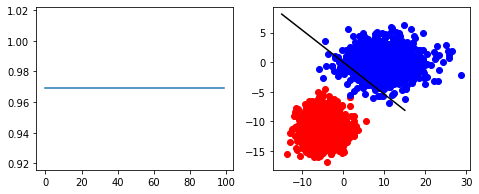

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Adadelta
------> epoch=100 loss=493637222.912, accuracy=0.013000000268220901
------> bias=-0.005309032741934061, weights=[-0.7573051, -0.2570895]


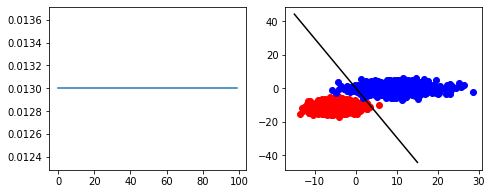

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=Adadelta
------> epoch=100 loss=0.9731517667770386, accuracy=0.016499999910593033
------> bias=0.00599294900894165, weights=[-0.9730089, -1.019724]


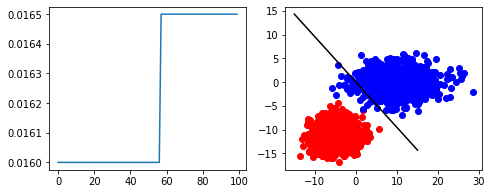

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Adadelta
------> epoch=100 loss=0.21420019268989562, accuracy=0.512499988079071
------> bias=0.00690996740013361, weights=[-0.5043159, 0.6317576]


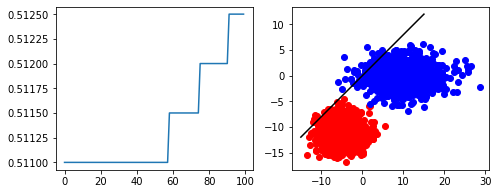

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=Adadelta
------> epoch=100 loss=0.5311648247241973, accuracy=0.9585000276565552
------> bias=0.0067563122138381, weights=[0.3159064, 0.72891134]


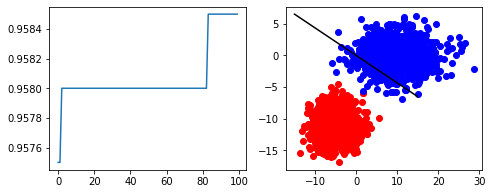

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=Adadelta
------> epoch=100 loss=0.5223143825531006, accuracy=0.968999981880188
------> bias=0.007862305268645287, weights=[0.37916145, 0.70488995]


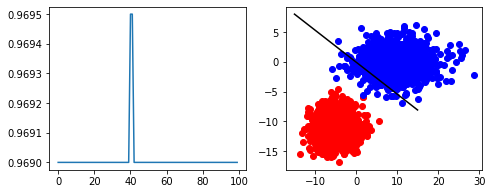

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=Adagrad
------> epoch=100 loss=3.6520838737487793, accuracy=0.026000000536441803
------> bias=-0.05600479245185852, weights=[-0.20440817, -0.36916605]


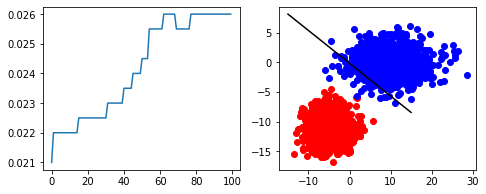

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=Adagrad
------> epoch=100 loss=0.8402519493103028, accuracy=0.6535000205039978
------> bias=-0.1585453301668167, weights=[0.93397915, -0.56335753]


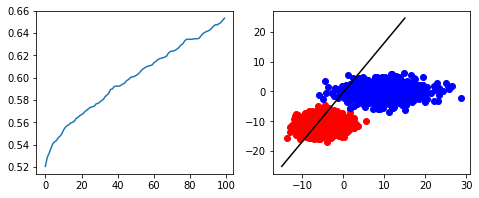

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=Adagrad
------> epoch=100 loss=0.005041332019270698, accuracy=0.9865000247955322
------> bias=0.09240195155143738, weights=[1.190517, 0.7724919]


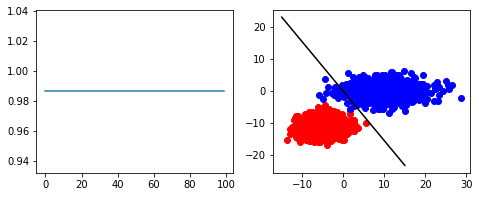

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=Adagrad
------> epoch=100 loss=0.32009623062610626, accuracy=0.13650000095367432
------> bias=-0.16833987832069397, weights=[-0.5207767, 0.13033016]


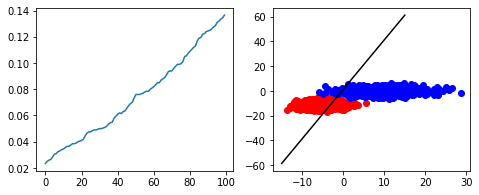

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=Adagrad
------> epoch=100 loss=0.7993034563064575, accuracy=0.05000000074505806
------> bias=-0.06848125904798508, weights=[-0.25006443, 0.017316746]


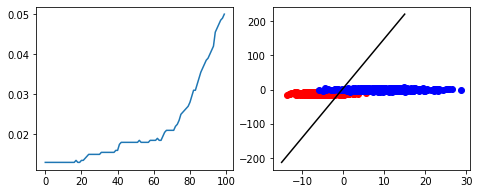

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Adagrad
------> epoch=100 loss=3170.089523071289, accuracy=0.8949999809265137
------> bias=-0.0683731809258461, weights=[0.24762152, 1.2948359]


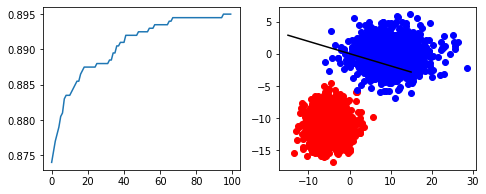

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=Adagrad
------> epoch=100 loss=0.3850628764629364, accuracy=0.5795000195503235
------> bias=-0.1435685008764267, weights=[1.479231, -1.0994989]


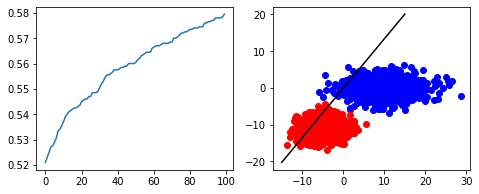

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Adagrad
------> epoch=100 loss=0.11789594078063965, accuracy=0.7250000238418579
------> bias=-0.15018784999847412, weights=[1.3735402, -0.6832711]


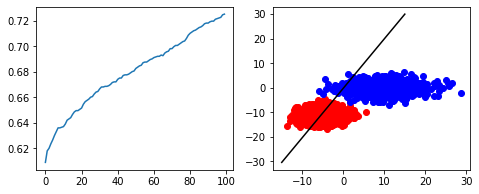

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=Adagrad
------> epoch=100 loss=4.89019779586792, accuracy=0.016499999910593033
------> bias=0.15645331144332886, weights=[-0.9248129, -0.9315857]


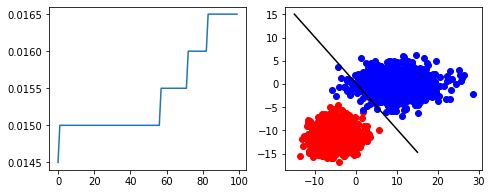

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=Adagrad
------> epoch=100 loss=1.6096621417999268, accuracy=0.2849999964237213
------> bias=-0.1562841683626175, weights=[-1.1324266, 0.55428654]


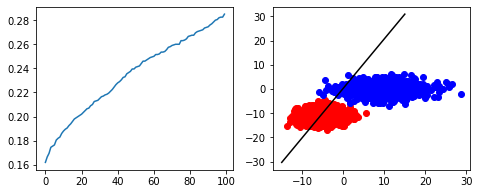

x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=Adam
------> epoch=100 loss=0.028951093394309284, accuracy=0.9890000224113464
------> bias=0.47565874457359314, weights=[0.6697121, 0.36196485]


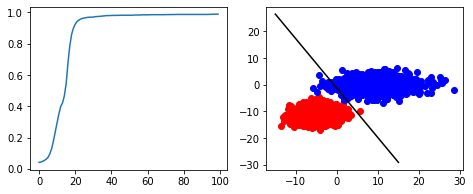

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=Adam
------> epoch=100 loss=0.506687869310379, accuracy=0.9959999918937683
------> bias=2.576810359954834, weights=[0.85537064, 0.83216894]


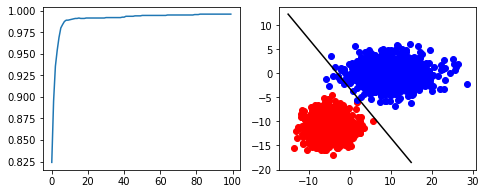

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=Adam
------> epoch=100 loss=0.0015218808362842538, accuracy=0.9980000257492065
------> bias=1.698773980140686, weights=[0.41165614, 0.46488246]


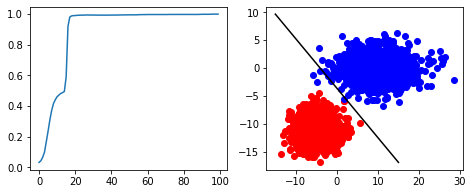

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=Adam
------> epoch=100 loss=0.0015112765729427338, accuracy=0.996999979019165
------> bias=1.656578779220581, weights=[0.43525654, 0.46699628]


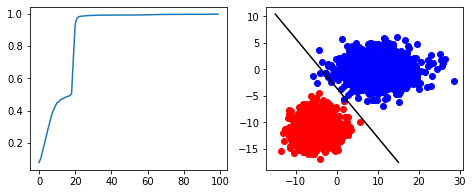

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=Adam
------> epoch=100 loss=0.00992218367755413, accuracy=0.9915000200271606
------> bias=1.5377399921417236, weights=[1.2620834, 0.80942464]


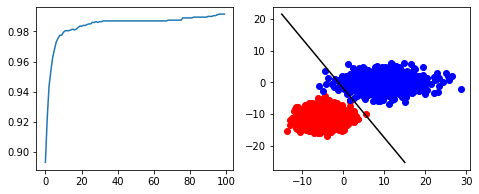

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Adam
------> epoch=100 loss=473045.94792370603, accuracy=0.9829999804496765
------> bias=-1.8378304243087769, weights=[1.6328053, 0.6618758]


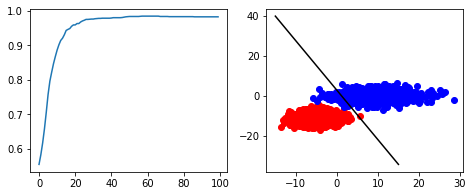

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=Adam
------> epoch=100 loss=0.00295020720991306, accuracy=0.9980000257492065
------> bias=1.7392507791519165, weights=[0.40519953, 0.47018933]


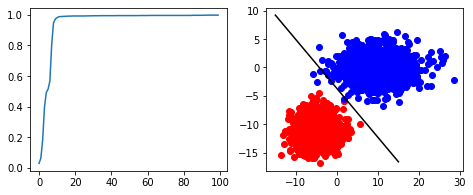

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Adam
------> epoch=100 loss=0.001315555897046579, accuracy=0.9959999918937683
------> bias=1.519485354423523, weights=[0.43118808, 0.4933112]


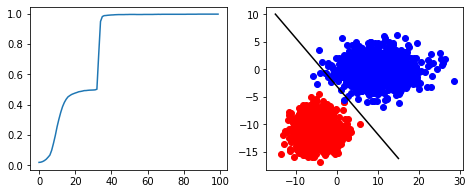

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=Adam
------> epoch=100 loss=0.503351559638977, accuracy=0.996999979019165
------> bias=2.311488151550293, weights=[0.43859997, 0.74908495]


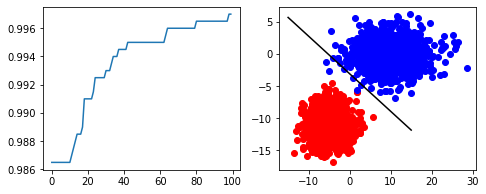

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=Adam
------> epoch=100 loss=0.5038606560230255, accuracy=0.9959999918937683
------> bias=2.350430727005005, weights=[0.599285, 0.8737741]


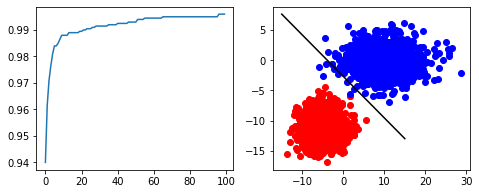

x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=Adamax
------> epoch=100 loss=0.019232765616849064, accuracy=0.9940000176429749
------> bias=1.1953096389770508, weights=[0.7127179, 0.5432624]


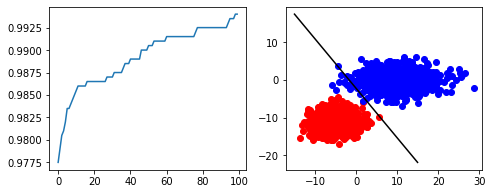

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=Adamax
------> epoch=100 loss=0.5085019679069519, accuracy=0.9959999918937683
------> bias=2.0031685829162598, weights=[0.7838052, 0.69932127]


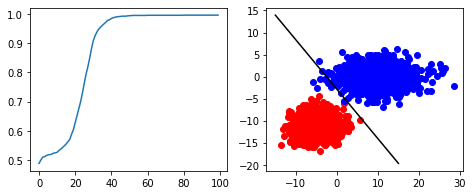

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=Adamax
------> epoch=100 loss=0.0023947107602871258, accuracy=0.9955000281333923
------> bias=1.0892746448516846, weights=[0.51789033, 0.41645017]


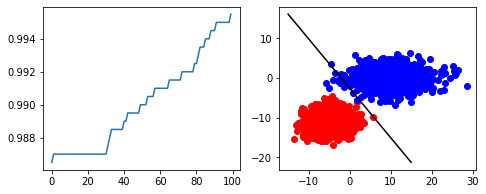

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=Adamax
------> epoch=100 loss=0.06725582101941109, accuracy=0.8100000023841858
------> bias=1.342415452003479, weights=[1.2066948, -0.3060598]


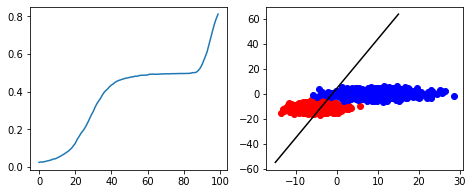

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=Adamax
------> epoch=100 loss=0.014304494231939316, accuracy=0.9869999885559082
------> bias=-0.14090794324874878, weights=[1.6589569, 0.6265099]


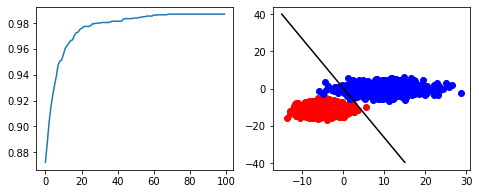

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Adamax
------> epoch=100 loss=1492407.559522461, accuracy=0.9835000038146973
------> bias=-1.6839042901992798, weights=[1.6201247, 0.43002027]


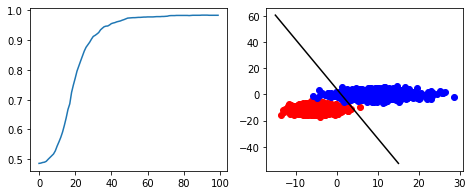

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=Adamax
------> epoch=100 loss=0.008506709272711304, accuracy=0.9869999885559082
------> bias=0.2167365401983261, weights=[0.7094485, 0.34832582]


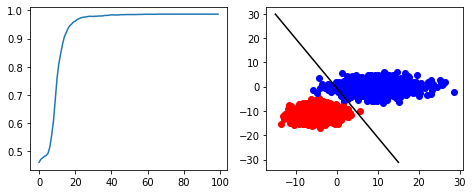

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Adamax
------> epoch=100 loss=0.0019959997391561044, accuracy=0.9944999814033508
------> bias=0.9296085238456726, weights=[0.45455608, 0.42026997]


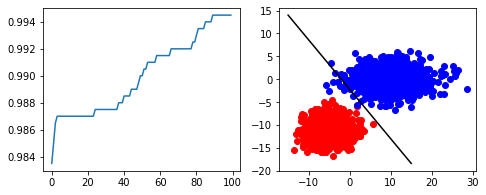

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=Adamax
------> epoch=100 loss=0.5097929391860961, accuracy=0.9900000095367432
------> bias=0.5124506950378418, weights=[0.48625818, 0.479671]


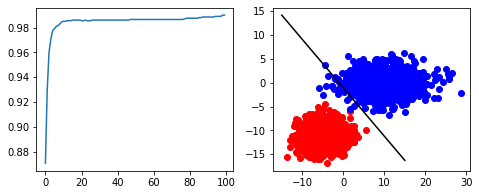

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=Adamax
------> epoch=100 loss=0.5115279784202575, accuracy=0.9860000014305115
------> bias=-0.10673616081476212, weights=[0.9275667, 0.55726856]


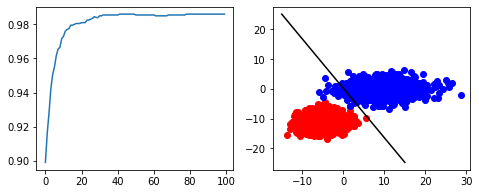

x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=Ftrl
------> epoch=100 loss=4.096869316101074, accuracy=0.0689999982714653
------> bias=-0.0807543471455574, weights=[-0.13880715, -0.5283163]


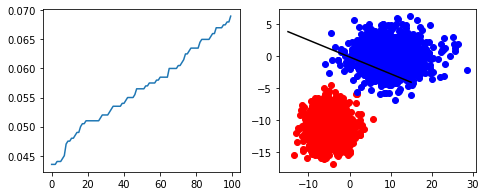

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=Ftrl
------> epoch=100 loss=0.6902362484931945, accuracy=0.8899999856948853
------> bias=-0.14389297366142273, weights=[0.39998323, -0.10208334]


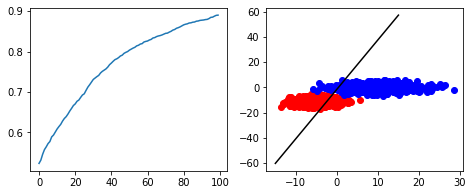

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=Ftrl
------> epoch=100 loss=0.02821833185851574, accuracy=0.9865000247955322
------> bias=0.03319460526108742, weights=[0.119212314, 0.08415231]


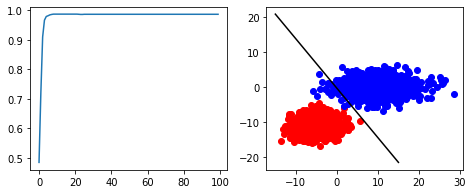

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=Ftrl
------> epoch=100 loss=0.024536528021097185, accuracy=0.9869999885559082
------> bias=0.07635733485221863, weights=[0.11839035, 0.10766539]


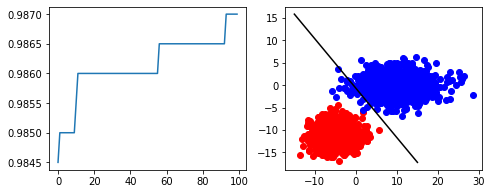

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=Ftrl
------> epoch=100 loss=0.15847333514690398, accuracy=0.9865000247955322
------> bias=0.04890470951795578, weights=[0.15478532, 0.12732269]


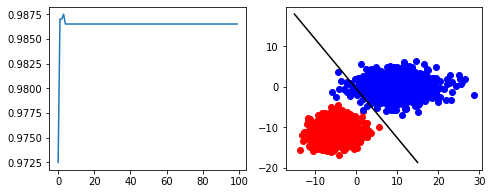

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Ftrl
------> epoch=100 loss=113288.7089765625, accuracy=0.9775000214576721
------> bias=-0.08895131200551987, weights=[0.4877128, 0.7280794]


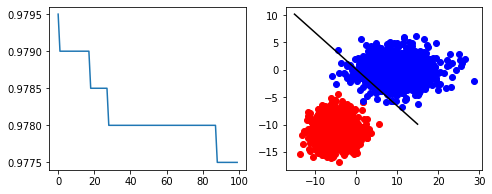

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=Ftrl
------> epoch=100 loss=0.049534575045108796, accuracy=0.987500011920929
------> bias=0.0831279456615448, weights=[0.11934648, 0.106769346]


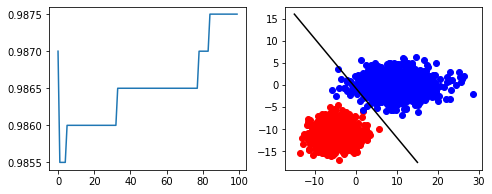

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Ftrl
------> epoch=100 loss=0.022762007594108583, accuracy=0.9835000038146973
------> bias=-0.03366405516862869, weights=[0.11525207, 0.11117781]


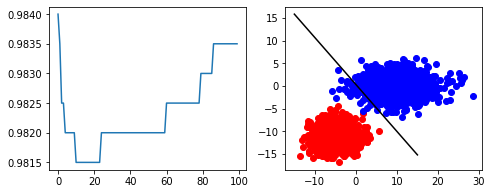

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=Ftrl
------> epoch=100 loss=0.564502613067627, accuracy=0.9804999828338623
------> bias=-0.03469574823975563, weights=[0.13763371, 0.1678525]


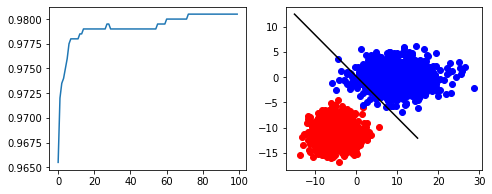

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=Ftrl
------> epoch=100 loss=0.9731008234024048, accuracy=0.5180000066757202
------> bias=-0.07393581420183182, weights=[-0.4000029, 0.57656395]


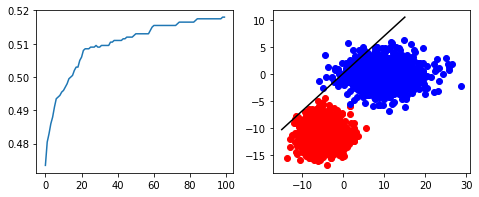

x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=Nadam
------> epoch=100 loss=0.03554979588277638, accuracy=0.9869999885559082
------> bias=-0.023519188165664673, weights=[0.8411173, 0.3424393]


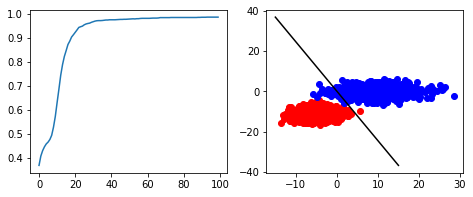

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=Nadam
------> epoch=100 loss=0.5138076410293579, accuracy=0.9869999885559082
------> bias=-0.061656296253204346, weights=[1.856298, 0.72021824]


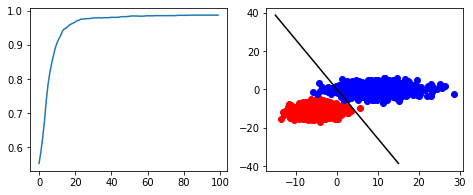

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=Nadam
------> epoch=100 loss=0.0015848314802860842, accuracy=0.9975000023841858
------> bias=1.6505146026611328, weights=[0.4366982, 0.461727]


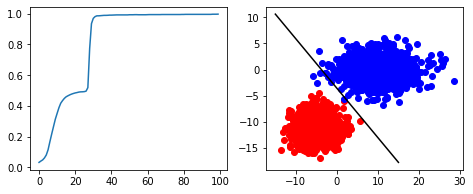

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=Nadam
------> epoch=100 loss=0.002643407225608826, accuracy=0.9919999837875366
------> bias=0.9469806551933289, weights=[0.6505203, 0.45573235]


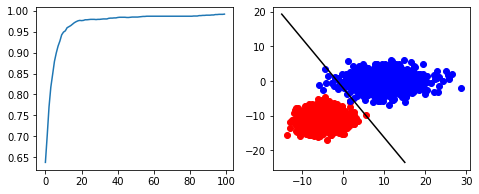

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=Nadam
------> epoch=100 loss=0.008275548070669174, accuracy=0.9955000281333923
------> bias=2.0333292484283447, weights=[0.85361445, 0.7418595]


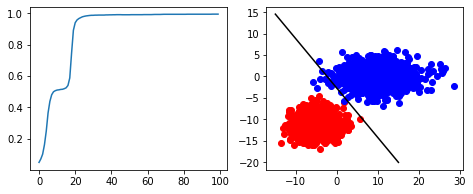

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Nadam
------> epoch=100 loss=66590.6943671875, accuracy=0.9714999794960022
------> bias=-0.804042637348175, weights=[0.5677783, 0.7046206]


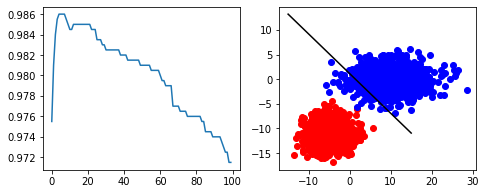

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=Nadam
------> epoch=100 loss=0.003031884613621514, accuracy=0.9980000257492065
------> bias=1.7079474925994873, weights=[0.42460373, 0.46788615]


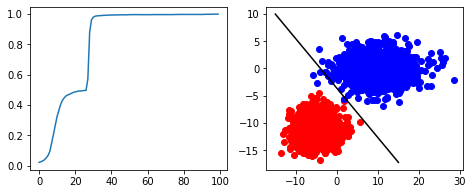

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Nadam
------> epoch=100 loss=0.00068682613177225, accuracy=0.9984999895095825
------> bias=2.522854804992676, weights=[0.37254643, 0.64549565]


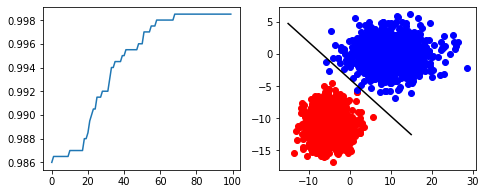

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=Nadam
------> epoch=100 loss=0.5037262507677078, accuracy=0.9965000152587891
------> bias=2.106344699859619, weights=[0.43695548, 0.7179488]


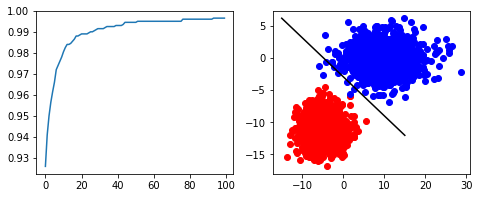

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=Nadam
------> epoch=100 loss=0.506929027557373, accuracy=0.9925000071525574
------> bias=1.0971646308898926, weights=[0.6034247, 0.6574165]


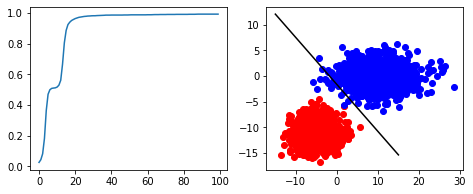

x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=RMSprop
------> epoch=100 loss=0.007236062344629318, accuracy=0.9980000257492065
------> bias=3.246650218963623, weights=[0.6561611, 0.83028585]


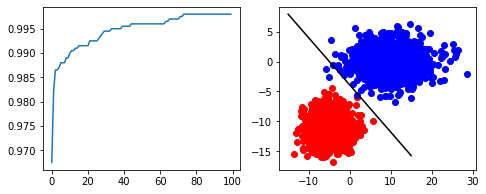

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=RMSprop
------> epoch=100 loss=0.5047482528686523, accuracy=0.9980000257492065
------> bias=3.4994277954101562, weights=[0.81918067, 0.9346986]


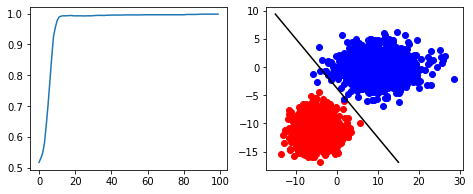

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=RMSprop
------> epoch=100 loss=0.0007242306724365335, accuracy=0.9984999895095825
------> bias=2.845954656600952, weights=[0.4042968, 0.6451682]


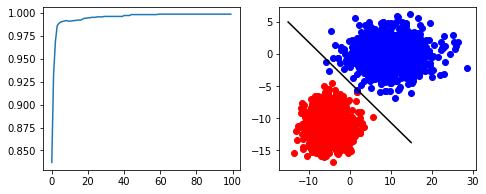

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=RMSprop
------> epoch=100 loss=0.0007451734840869903, accuracy=0.9984999895095825
------> bias=2.7454822063446045, weights=[0.4125291, 0.63595223]


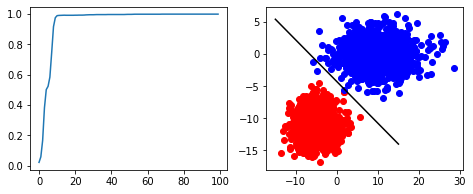

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=RMSprop
------> epoch=100 loss=0.006115494042634964, accuracy=0.9959999918937683
------> bias=2.8379600048065186, weights=[0.91144294, 0.8747412]


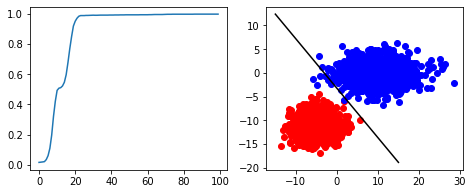

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=RMSprop
------> epoch=99 loss=10.819851602077485, accuracy=0.953499972820282
------> bias=-0.8575334548950195, weights=[1.0813583, 2.2037039]


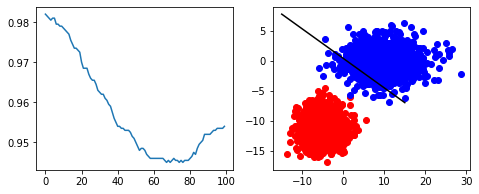

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=RMSprop
------> epoch=100 loss=0.002601527464808896, accuracy=0.9980000257492065
------> bias=1.9299907684326172, weights=[0.42698544, 0.5080431]


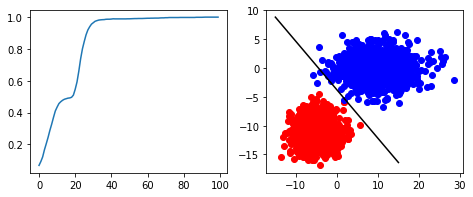

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=RMSprop
------> epoch=100 loss=0.0006488107560653589, accuracy=0.9984999895095825
------> bias=2.6547060012817383, weights=[0.4125279, 0.66824573]


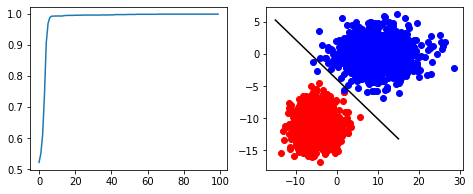

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=RMSprop
------> epoch=100 loss=0.503889169216156, accuracy=0.9959999918937683
------> bias=2.0631651878356934, weights=[0.49586275, 0.7366128]


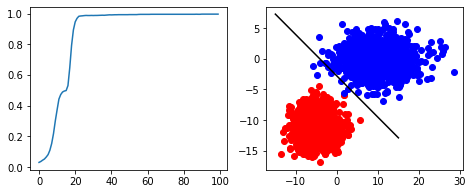

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=RMSprop
------> epoch=100 loss=0.5032405993938446, accuracy=0.9965000152587891
------> bias=2.795255184173584, weights=[0.6132062, 0.93948174]


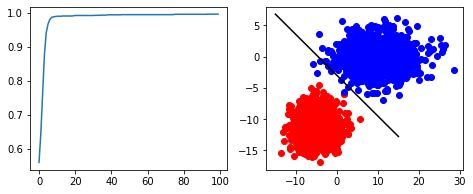

x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=SGD
------> epoch=100 loss=0.02417656557634473, accuracy=0.9909999966621399
------> bias=0.7292433977127075, weights=[0.73823154, 0.50013113]


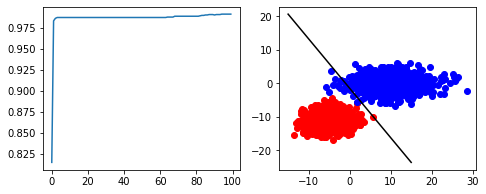

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=SGD
------> epoch=100 loss=0.5131270549297333, accuracy=0.987500011920929
------> bias=0.4654674232006073, weights=[1.2344263, 0.75646746]


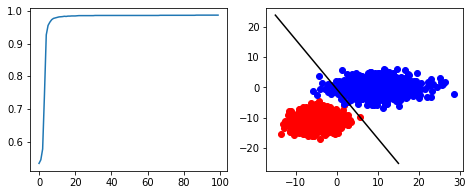

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=SGD
------> epoch=100 loss=0.004848381947373582, accuracy=0.9869999885559082
------> bias=0.038105543702840805, weights=[1.0844423, 0.41479468]


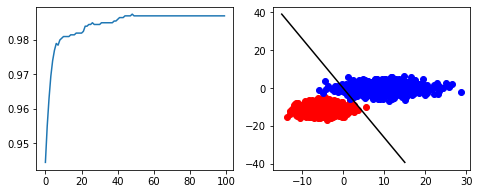

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=SGD
------> epoch=100 loss=0.004597288131713867, accuracy=0.9869999885559082
------> bias=-0.023853760212659836, weights=[1.2777759, 0.4358301]


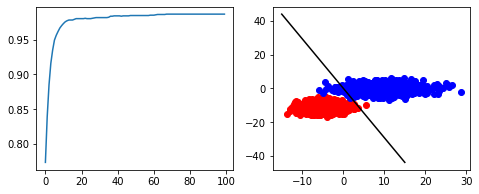

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=SGD
------> epoch=100 loss=0.013537358045578003, accuracy=0.9865000247955322
------> bias=0.27182865142822266, weights=[1.4475071, 0.94224244]


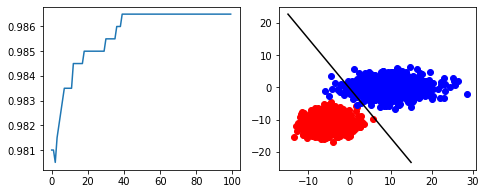

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=SGD
------> epoch=100 loss=2.600151091814041, accuracy=0.9739999771118164
------> bias=-164.6151123046875, weights=[928.8547, 1502.6567]


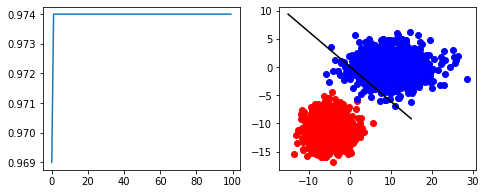

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=SGD
------> epoch=100 loss=0.009549376646519362, accuracy=0.9860000014305115
------> bias=0.512984037399292, weights=[1.0618715, 1.0169082]


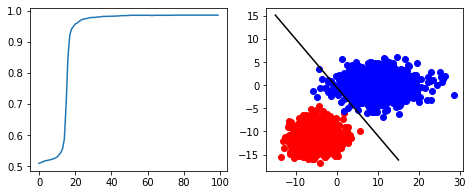

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=SGD
------> epoch=100 loss=0.0035473695081309417, accuracy=0.9869999885559082
------> bias=0.0989270731806755, weights=[0.57801443, 0.35021812]


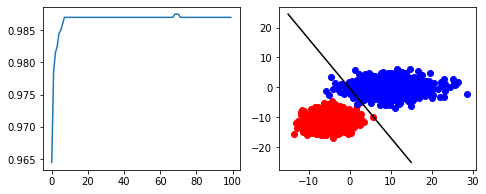

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=SGD
------> epoch=100 loss=0.5095345826148987, accuracy=0.9904999732971191
------> bias=0.5477172136306763, weights=[0.4709972, 0.48990324]


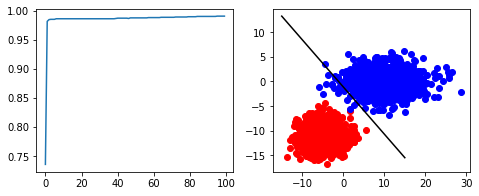

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=SGD
------> epoch=100 loss=0.5095593636035919, accuracy=0.9865000247955322
------> bias=0.3415355086326599, weights=[0.73866653, 0.6268381]


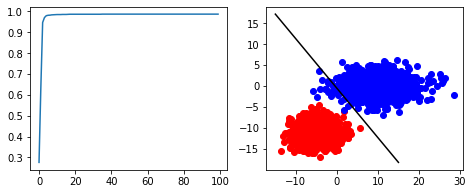



loss=mean_squared_logarithmic_error, optimizer=Nadam is best(epoch=100, loss=0.00068682613177225, accuracy=0.9984999895095825)
-------------------------------------------






In [10]:
test(data[1], 100)

### Файл 3

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=Adadelta
------> epoch=30 loss=0.8101889715194702, accuracy=0.6909999847412109
------> bias=-0.00372653198428452, weights=[0.69680685, -0.578533]


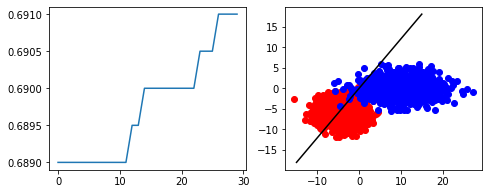

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=Adadelta
------> epoch=30 loss=0.9541674785614014, accuracy=0.5410000085830688
------> bias=0.0010798133444041014, weights=[-0.1161836, 0.36188227]


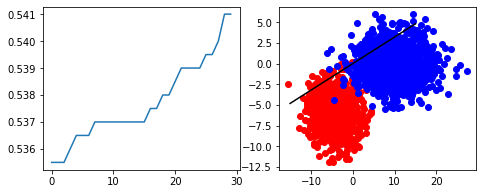

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=Adadelta
------> epoch=30 loss=0.06609178847074508, accuracy=0.8050000071525574
------> bias=0.004064688924700022, weights=[0.044597995, 0.96641034]


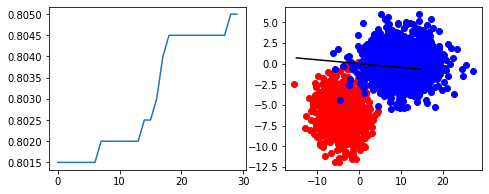

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=Adadelta
------> epoch=30 loss=0.18550782251358033, accuracy=0.5065000057220459
------> bias=-0.0024335139896720648, weights=[0.39695376, -0.78666365]


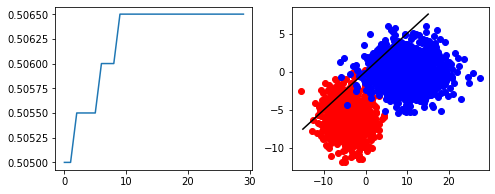

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=Adadelta
------> epoch=30 loss=0.025514874905347824, accuracy=0.9865000247955322
------> bias=0.00027858902467414737, weights=[0.7624812, 0.57046527]


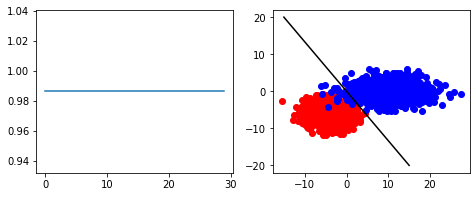

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Adadelta
------> epoch=30 loss=496200659.456, accuracy=0.03999999910593033
------> bias=-0.001413971185684204, weights=[-0.34509358, -0.89250237]


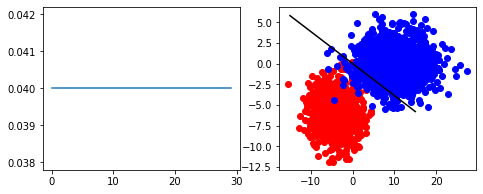

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=Adadelta
------> epoch=30 loss=0.38203833758831024, accuracy=0.5454999804496765
------> bias=0.0032655003014951944, weights=[-0.28692558, 0.94179523]


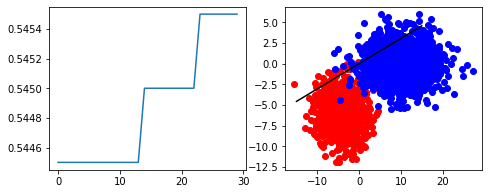

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Adadelta
------> epoch=30 loss=0.0771489444822073, accuracy=0.8180000185966492
------> bias=-0.0029981115367263556, weights=[1.3185658, -0.6236062]


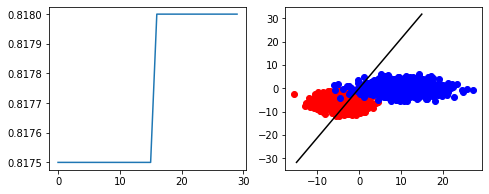

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=Adadelta
------> epoch=30 loss=1.2277382106781005, accuracy=0.5740000009536743
------> bias=0.004050559364259243, weights=[-0.18561494, 0.82226175]


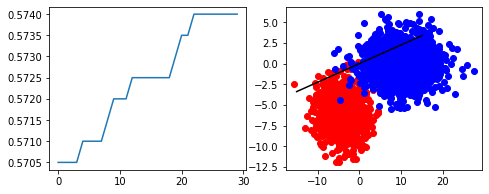

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=Adadelta
------> epoch=30 loss=0.5603282189369202, accuracy=0.9865000247955322
------> bias=-0.0023007814306765795, weights=[0.5899163, 0.31223935]


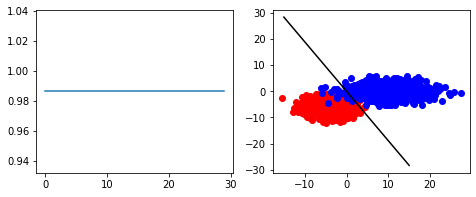

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=Adagrad
------> epoch=30 loss=0.08312363916635514, accuracy=0.9714999794960022
------> bias=-0.05034303292632103, weights=[1.1103742, 0.19671622]


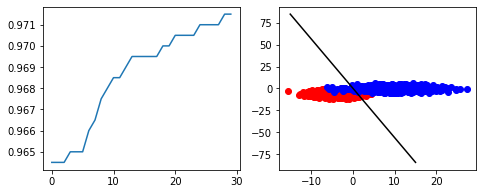

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=Adagrad
------> epoch=30 loss=0.7297505559921265, accuracy=0.7914999723434448
------> bias=-0.08056145906448364, weights=[0.777346, -0.4470021]


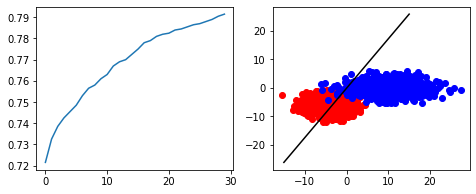

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=Adagrad
------> epoch=30 loss=0.2930388581752777, accuracy=0.3605000078678131
------> bias=0.07548478990793228, weights=[0.14081383, -1.1774157]


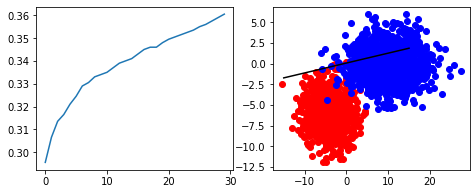

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=Adagrad
------> epoch=30 loss=0.2736317627429962, accuracy=0.30250000953674316
------> bias=-0.07832476496696472, weights=[-0.6975169, 0.55380505]


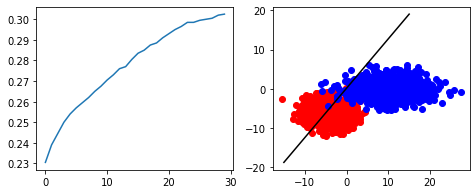

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=Adagrad
------> epoch=30 loss=0.11282750380039215, accuracy=0.9154999852180481
------> bias=-0.0771261677145958, weights=[0.7653943, -0.11367875]


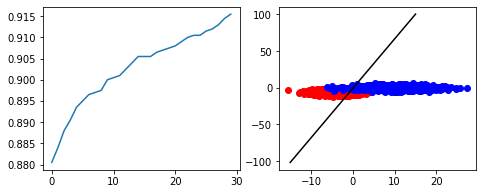

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Adagrad
------> epoch=30 loss=428999040.512, accuracy=0.5335000157356262
------> bias=-0.08244065940380096, weights=[0.6965606, -1.1485103]


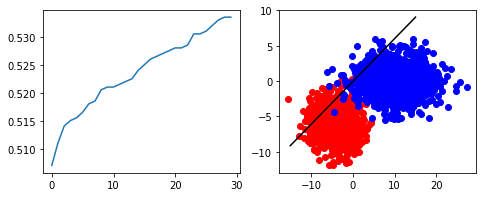

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=Adagrad
------> epoch=30 loss=0.046427983164787294, accuracy=0.953499972820282
------> bias=-0.0712902694940567, weights=[0.37516063, 0.0026462756]


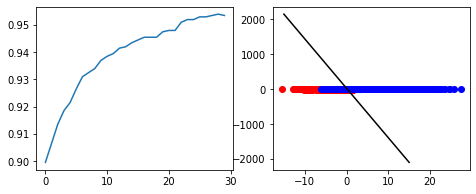

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Adagrad
------> epoch=30 loss=0.11676543760299683, accuracy=0.6819999814033508
------> bias=-0.08394502848386765, weights=[0.41575596, -0.37046802]


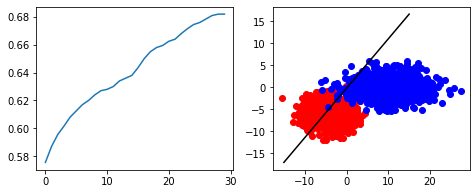

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=Adagrad
------> epoch=30 loss=4.085413879394531, accuracy=0.02500000037252903
------> bias=0.08349017053842545, weights=[-0.7136853, -0.14842786]


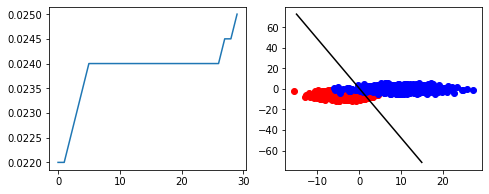

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=Adagrad
------> epoch=30 loss=1.164229133605957, accuracy=0.47999998927116394
------> bias=-0.07369254529476166, weights=[-0.13290417, 0.23194261]


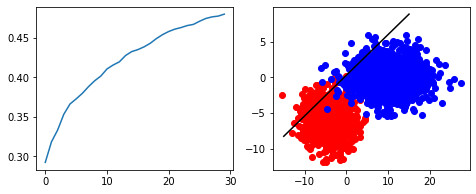

x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=Adam
------> epoch=30 loss=0.14193823730945587, accuracy=0.9750000238418579
------> bias=-0.7134886384010315, weights=[0.3530499, 0.059908215]


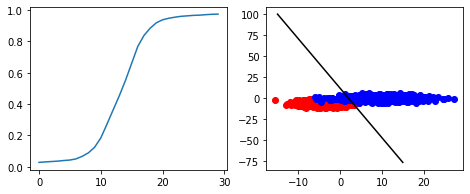

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=Adam
------> epoch=30 loss=0.5322052960395813, accuracy=0.9865000247955322
------> bias=0.12541747093200684, weights=[0.5677769, 0.56351227]


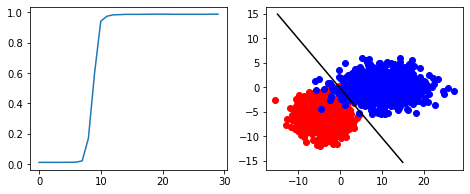

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=Adam
------> epoch=30 loss=0.006678078353172168, accuracy=0.9854999780654907
------> bias=-0.26095128059387207, weights=[0.6001853, 0.3450433]


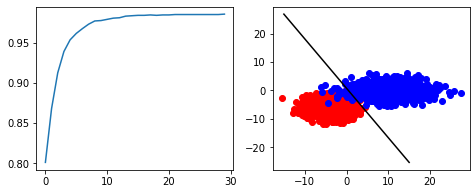

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=Adam
------> epoch=30 loss=0.00485055023431778, accuracy=0.9879999756813049
------> bias=0.601426362991333, weights=[0.44653141, 0.5630407]


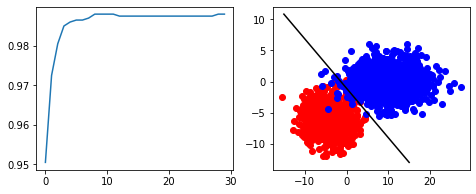

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=Adam
------> epoch=30 loss=0.02621839375793934, accuracy=0.9825000166893005
------> bias=-0.8230088353157043, weights=[1.2341948, 0.41566953]


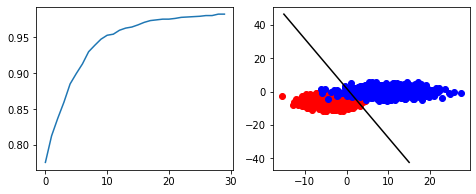

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Adam
------> epoch=30 loss=3782895.005, accuracy=0.6184999942779541
------> bias=-1.3593851327896118, weights=[0.026621308, 0.75639665]


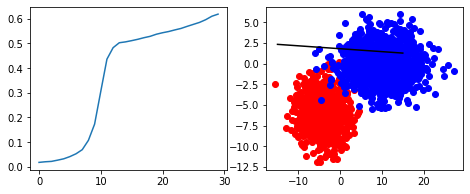

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=Adam
------> epoch=30 loss=0.013042095446959138, accuracy=0.9879999756813049
------> bias=0.32706019282341003, weights=[0.3582705, 0.48149]


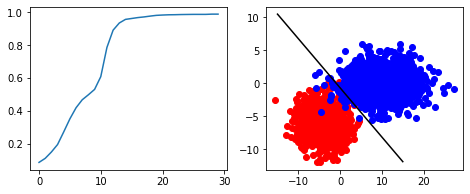

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Adam
------> epoch=30 loss=0.00727272764313966, accuracy=0.9825000166893005
------> bias=-0.5912729501724243, weights=[0.5307613, 0.26868382]


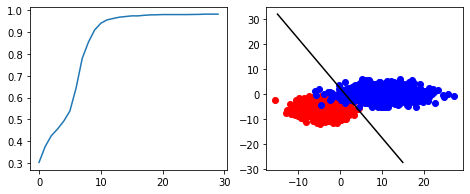

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=Adam
------> epoch=30 loss=0.5609675173759461, accuracy=0.9559999704360962
------> bias=1.0654032230377197, weights=[0.09323094, 0.6941264]


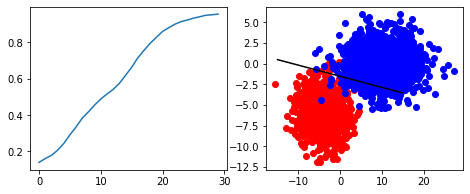

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=Adam
------> epoch=30 loss=0.5337381925582886, accuracy=0.9775000214576721
------> bias=-0.31232067942619324, weights=[0.397212, 0.57960397]


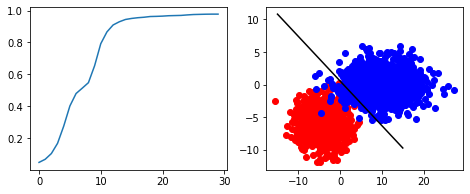

x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=Adamax
------> epoch=30 loss=0.5336129665374756, accuracy=0.8429999947547913
------> bias=-1.0001740455627441, weights=[1.5891286, -0.7288168]


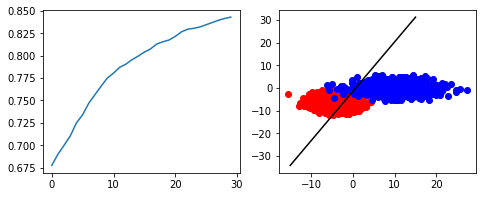

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=Adamax
------> epoch=30 loss=0.5306985976696015, accuracy=0.9869999885559082
------> bias=0.6788845062255859, weights=[0.49669448, 0.76490104]


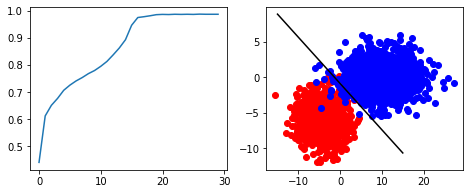

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=Adamax
------> epoch=30 loss=0.13000628232955933, accuracy=0.737500011920929
------> bias=0.33998069167137146, weights=[-0.93904424, 36.518105]


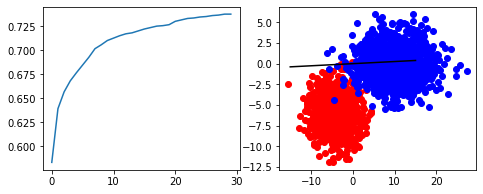

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=Adamax
------> epoch=30 loss=0.0060801288783550265, accuracy=0.9879999756813049
------> bias=0.5036554336547852, weights=[0.34007522, 0.52460575]


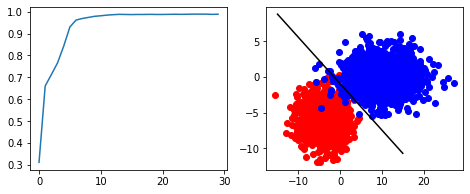

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=Adamax
------> epoch=30 loss=0.023708191722631455, accuracy=0.9860000014305115
------> bias=-0.23459361493587494, weights=[1.1626223, 0.52364284]


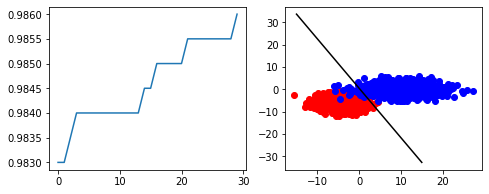

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Adamax
------> epoch=30 loss=496697347.584, accuracy=0.013500000350177288
------> bias=-0.2837735712528229, weights=[-0.9192245, -0.9381908]


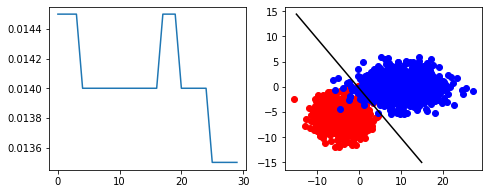

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=Adamax
------> epoch=2 loss=0.23849140012264253, accuracy=0.7615000009536743
------> bias=0.003100214060395956, weights=[0.2860124, 13149.926]


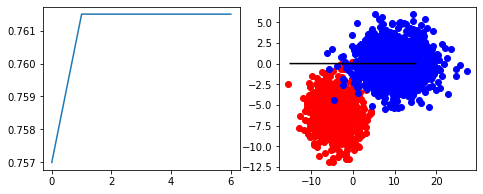

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Adamax
------> epoch=30 loss=0.01881717465724796, accuracy=0.9539999961853027
------> bias=-0.6652581095695496, weights=[1.0702102, -0.038254857]


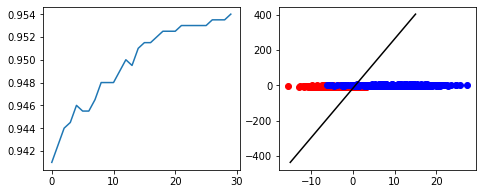

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=Adamax
------> epoch=30 loss=0.7889039793014526, accuracy=0.7114999890327454
------> bias=-0.3762339651584625, weights=[0.80112886, -0.65263283]


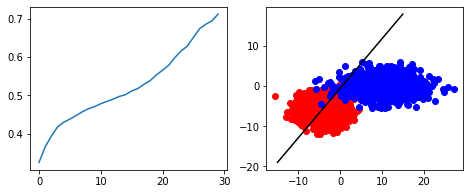

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=Adamax
------> epoch=30 loss=0.5233508884906769, accuracy=0.9764999747276306
------> bias=0.538762629032135, weights=[0.4723165, 1.0390543]


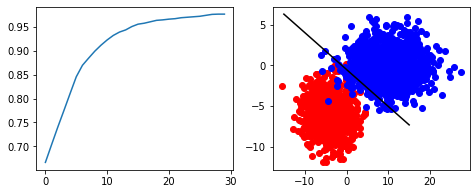

x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=Ftrl
------> epoch=30 loss=2.8234988632202147, accuracy=0.03350000083446503
------> bias=-0.026043610647320747, weights=[-0.19118702, -0.42852804]


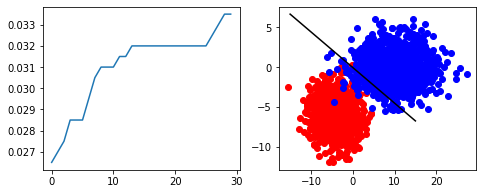

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=Ftrl
------> epoch=30 loss=0.7986187100410461, accuracy=0.9850000143051147
------> bias=0.001970736077055335, weights=[0.08322791, 0.095892616]


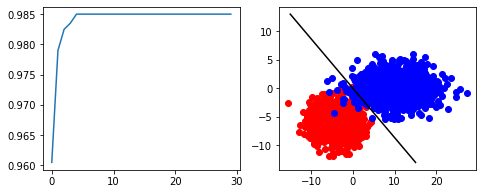

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=Ftrl
------> epoch=30 loss=0.05526282531023025, accuracy=0.9860000014305115
------> bias=-0.0018011311767622828, weights=[0.07464922, 0.07253361]


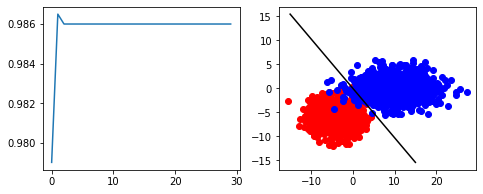

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=Ftrl
------> epoch=30 loss=0.052675770401954654, accuracy=0.9865000247955322
------> bias=-0.00724009657278657, weights=[0.08002164, 0.068624526]


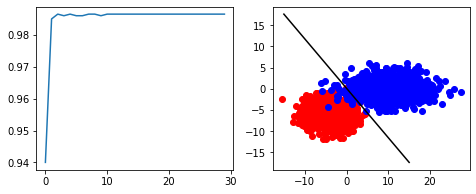

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=Ftrl
------> epoch=30 loss=0.23664740085601807, accuracy=0.9104999899864197
------> bias=-0.06405115872621536, weights=[0.22847913, -0.042123217]


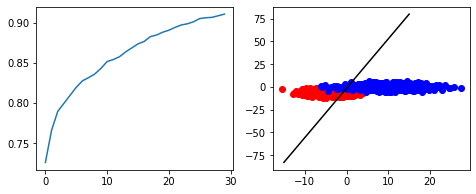

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Ftrl
------> epoch=30 loss=32640668.408, accuracy=0.9745000004768372
------> bias=-0.07440904527902603, weights=[0.9400514, 0.18673562]


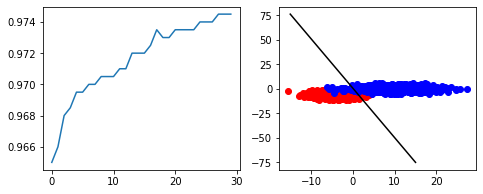

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=Ftrl
------> epoch=30 loss=0.11045231938362121, accuracy=0.9854999780654907
------> bias=-0.00037187940324656665, weights=[0.07404906, 0.07400864]


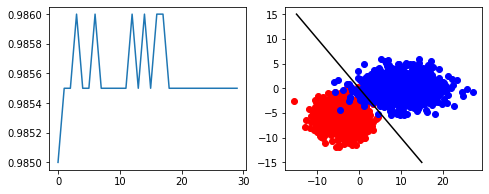

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Ftrl
------> epoch=30 loss=0.05459314405918121, accuracy=0.984499990940094
------> bias=-0.0605301707983017, weights=[0.098876804, 0.04731529]


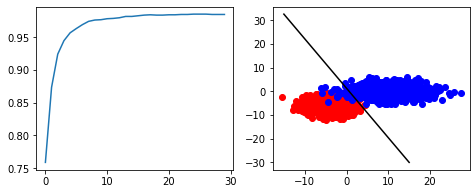

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=Ftrl
------> epoch=30 loss=4.706170482635498, accuracy=0.05249999836087227
------> bias=0.08339139819145203, weights=[-0.8504941, 0.018326228]


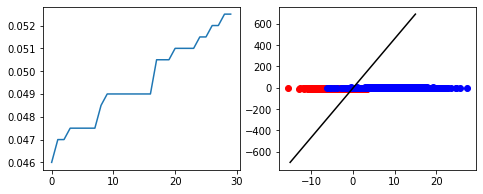

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=Ftrl
------> epoch=30 loss=0.9260436668395996, accuracy=0.9775000214576721
------> bias=-0.07524914294481277, weights=[0.06279003, 0.08195194]


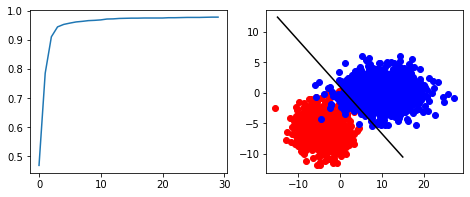

x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=Nadam
------> epoch=30 loss=0.03928510881960392, accuracy=0.9879999756813049
------> bias=0.6923342943191528, weights=[0.5387346, 0.7199445]


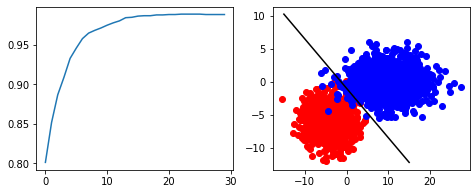

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=Nadam
------> epoch=30 loss=0.5155108008384705, accuracy=0.9869999885559082
------> bias=0.1296255737543106, weights=[1.4757475, 1.1641004]


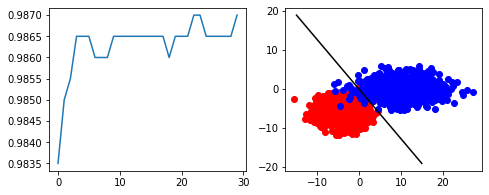

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=Nadam
------> epoch=30 loss=0.007747448764741421, accuracy=0.9854999780654907
------> bias=0.017621183767914772, weights=[0.36307058, 0.33510494]


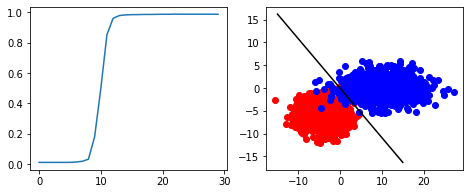

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=Nadam
------> epoch=30 loss=0.005785723716020584, accuracy=0.9869999885559082
------> bias=0.9311232566833496, weights=[0.42172003, 0.92068523]


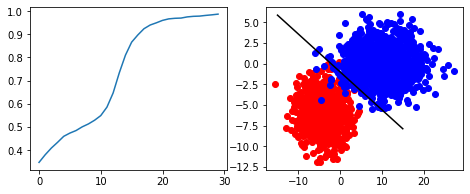

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=Nadam
------> epoch=30 loss=0.031301475167274474, accuracy=0.9865000247955322
------> bias=0.1765637844800949, weights=[0.5645832, 0.60258853]


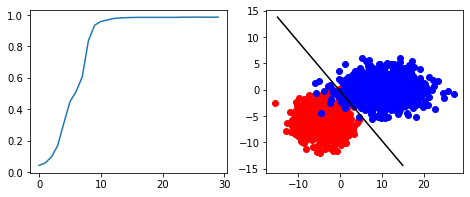

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Nadam
------> epoch=30 loss=6946595.499, accuracy=0.9819999933242798
------> bias=-0.8261858224868774, weights=[0.62325925, 0.43958816]


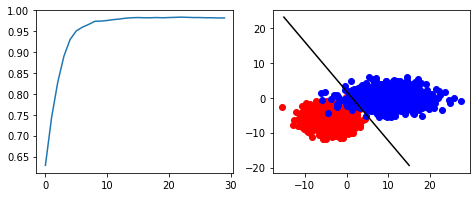

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=Nadam
------> epoch=30 loss=0.010082021640613675, accuracy=0.9925000071525574
------> bias=1.024444580078125, weights=[0.36712518, 0.6524506]


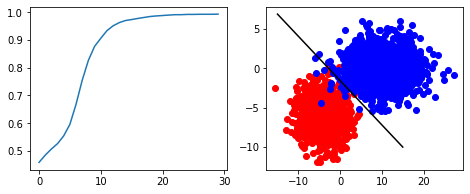

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Nadam
------> epoch=30 loss=0.0060349025707691906, accuracy=0.984499990940094
------> bias=0.16977766156196594, weights=[0.34471112, 0.53585184]


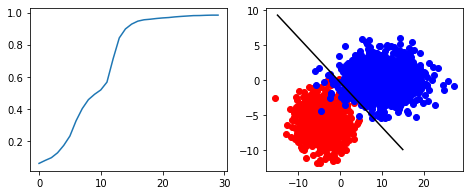

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=Nadam
------> epoch=30 loss=0.5195349588394165, accuracy=0.9869999885559082
------> bias=0.4007720649242401, weights=[0.63349247, 0.80289793]


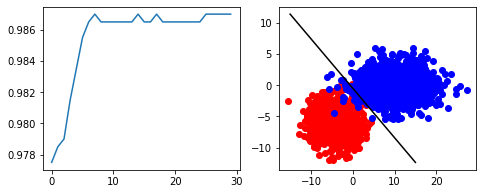

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=Nadam
------> epoch=30 loss=0.539890070438385, accuracy=0.9850000143051147
------> bias=-0.45609474182128906, weights=[0.67910194, 0.3639294]


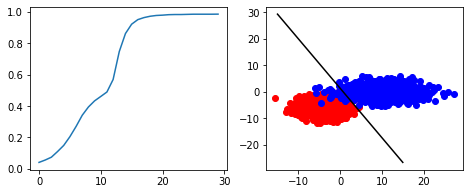

x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=RMSprop
------> epoch=30 loss=0.031217791985720396, accuracy=0.9900000095367432
------> bias=1.2756832838058472, weights=[0.6730589, 0.8980873]


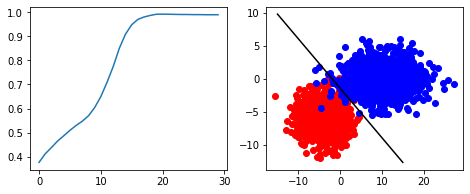

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=RMSprop
------> epoch=30 loss=0.5161041588783264, accuracy=0.9879999756813049
------> bias=0.887233555316925, weights=[1.0491644, 1.0758022]


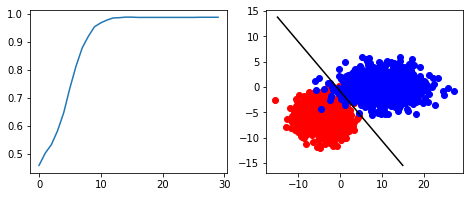

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=RMSprop
------> epoch=30 loss=0.00777899842755869, accuracy=0.9800000190734863
------> bias=-1.0758973360061646, weights=[1.0363387, 0.3332281]


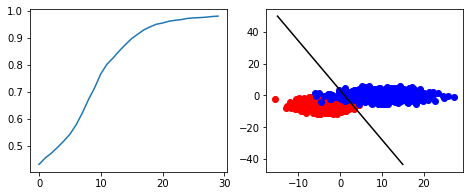

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=RMSprop
------> epoch=30 loss=0.004109252542257309, accuracy=0.9879999756813049
------> bias=0.7521008849143982, weights=[0.67281824, 0.7435061]


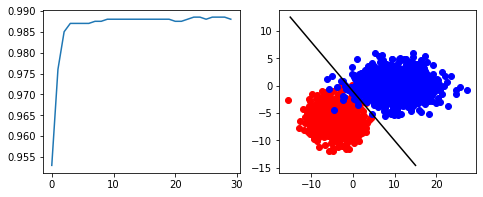

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=RMSprop
------> epoch=30 loss=0.016578688830137252, accuracy=0.9854999780654907
------> bias=-0.4235766530036926, weights=[1.5348606, 1.0372422]


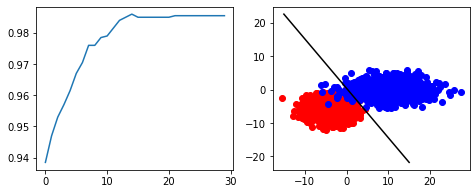

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=RMSprop
------> epoch=30 loss=326609.72391308594, accuracy=0.9470000267028809
------> bias=-1.5100114345550537, weights=[0.6409749, 1.3057342]


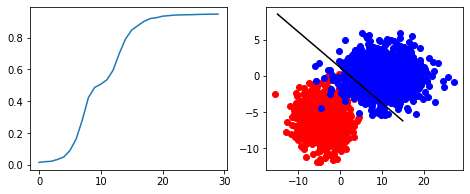

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=RMSprop
------> epoch=30 loss=0.013320138542621863, accuracy=0.984000027179718
------> bias=-0.6018372774124146, weights=[0.80128175, 0.4155931]


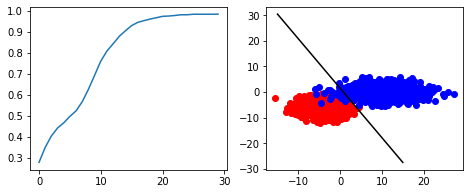

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=RMSprop
------> epoch=30 loss=0.0037730404519243166, accuracy=0.9879999756813049
------> bias=0.9274159669876099, weights=[0.6095589, 0.84041387]


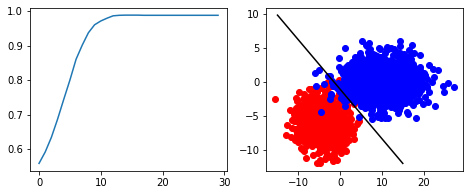

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=RMSprop
------> epoch=30 loss=0.5175414743423462, accuracy=0.9879999756813049
------> bias=0.7942135334014893, weights=[0.58424014, 0.8908463]


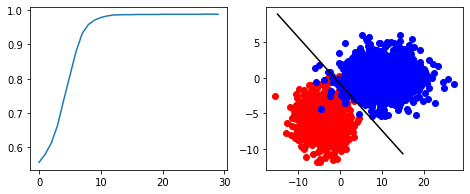

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=RMSprop
------> epoch=30 loss=0.5139202208518981, accuracy=0.9860000014305115
------> bias=0.3545472025871277, weights=[1.1415514, 1.3542266]


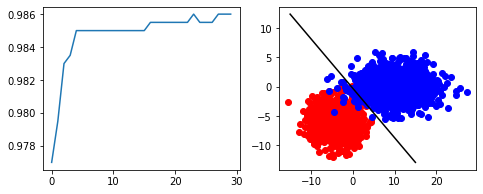

x_train: (2000, 2), y_trian: (2000,), loss=binary_crossentropy, optimizer=SGD
------> epoch=30 loss=0.04019152438640595, accuracy=0.987500011920929
------> bias=0.17979805171489716, weights=[0.75908077, 0.6852787]


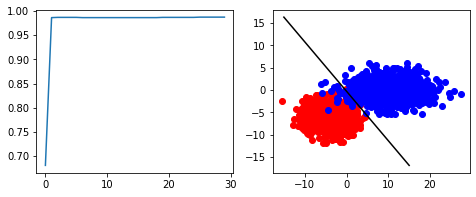

x_train: (2000, 2), y_trian: (2000,), loss=categorical_hinge, optimizer=SGD
------> epoch=30 loss=0.5160091147422791, accuracy=0.9854999780654907
------> bias=0.05992390215396881, weights=[1.3236578, 1.3193643]


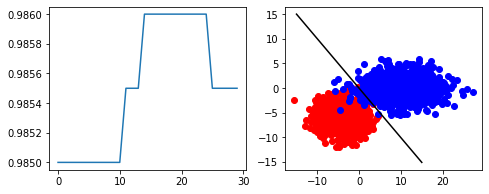

x_train: (2000, 2), y_trian: (2000,), loss=huber_loss, optimizer=SGD
------> epoch=30 loss=0.006435728323762305, accuracy=0.9865000247955322
------> bias=-0.07332885265350342, weights=[0.7937713, 0.38878372]


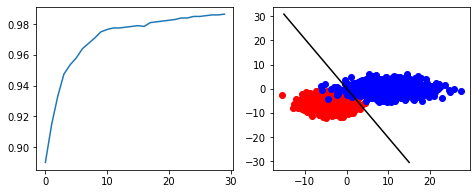

x_train: (2000, 2), y_trian: (2000,), loss=logcosh, optimizer=SGD
------> epoch=30 loss=0.006194526821374893, accuracy=0.9865000247955322
------> bias=-0.031010044738650322, weights=[0.4799919, 0.36590642]


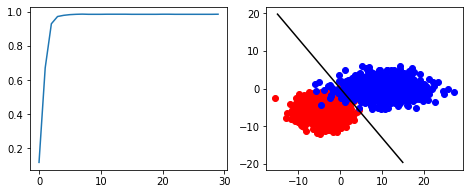

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_error, optimizer=SGD
------> epoch=30 loss=0.020448035329580307, accuracy=0.9860000014305115
------> bias=-0.17878274619579315, weights=[1.1650034, 0.66852605]


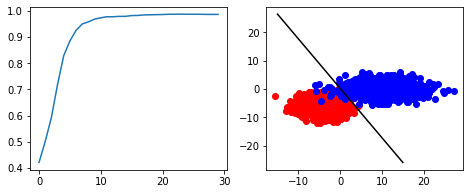

x_train: (2000, 2), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=SGD
------> epoch=2 loss=1500041.428, accuracy=0.5845000147819519
------> bias=-36355.37890625, weights=[-23260.014, 129502.2]


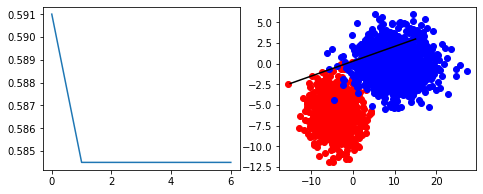

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_error, optimizer=SGD
------> epoch=30 loss=0.010821276780567131, accuracy=0.9860000014305115
------> bias=0.15320472419261932, weights=[0.74594504, 0.84634644]


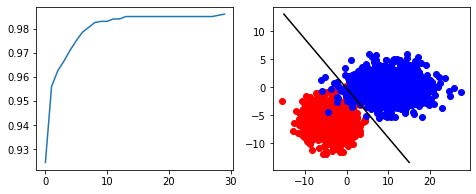

x_train: (2000, 2), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=SGD
------> epoch=30 loss=0.009076360707724234, accuracy=0.9775000214576721
------> bias=-0.18651121854782104, weights=[1.1589286, 0.32410088]


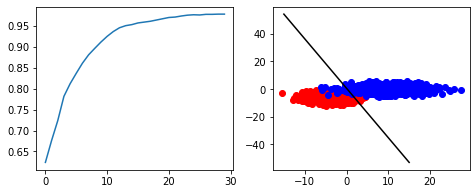

x_train: (2000, 2), y_trian: (2000,), loss=poisson, optimizer=SGD
------> epoch=30 loss=0.5210765895843505, accuracy=0.9850000143051147
------> bias=0.11799561232328415, weights=[0.5351428, 0.6819722]


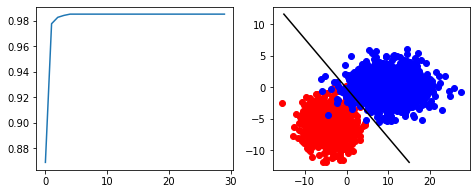

x_train: (2000, 2), y_trian: (2000,), loss=squared_hinge, optimizer=SGD
------> epoch=30 loss=0.5164604101181031, accuracy=0.9860000014305115
------> bias=-0.3305833637714386, weights=[1.0706936, 0.9170891]


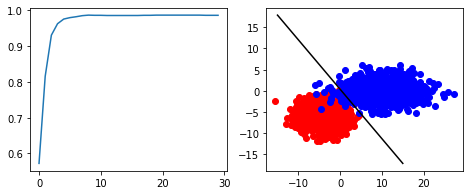



loss=mean_squared_error, optimizer=Nadam is best(epoch=30, loss=0.010082021640613675, accuracy=0.9925000071525574)
-------------------------------------------






In [10]:
test(data[2], 30)

### Файл 4

x_train: (2000, 3), y_trian: (2000,), loss=binary_crossentropy, optimizer=Adadelta
------> epoch=30 loss=2.265189329147339, accuracy=0.5274999737739563
------> bias=0.003591418731957674, weights=[-0.70536065, 0.9900704, 0.44331667]


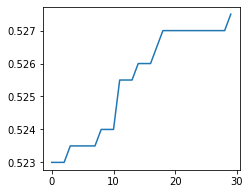

x_train: (2000, 3), y_trian: (2000,), loss=categorical_hinge, optimizer=Adadelta
------> epoch=30 loss=1.1025315885543823, accuracy=0.3930000066757202
------> bias=-0.002035037614405155, weights=[-0.42811668, 1.1669903, -0.14617932]


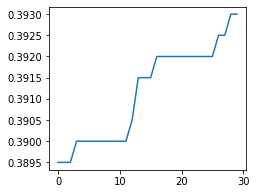

x_train: (2000, 3), y_trian: (2000,), loss=huber_loss, optimizer=Adadelta
------> epoch=30 loss=0.11634725499153137, accuracy=0.6919999718666077
------> bias=0.0018742894753813744, weights=[-0.42533177, 0.030129407, 0.76522416]


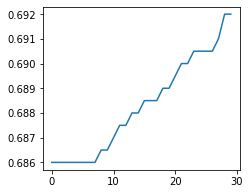

x_train: (2000, 3), y_trian: (2000,), loss=logcosh, optimizer=Adadelta
------> epoch=30 loss=0.19258021628856659, accuracy=0.445499986410141
------> bias=0.0010536692570894957, weights=[-0.09393841, 0.9983978, -0.28559563]


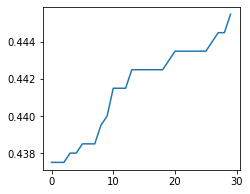

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_error, optimizer=Adadelta
------> epoch=30 loss=0.014917534664273263, accuracy=0.9929999709129333
------> bias=0.0010123963002115488, weights=[0.4529279, 0.51879543, 0.93052006]


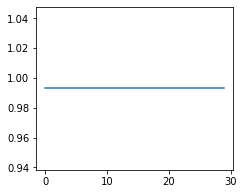

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Adadelta
------> epoch=30 loss=316387745.408, accuracy=0.5659999847412109
------> bias=-0.003528081113472581, weights=[1.0078958, -0.24780636, -0.7986679]


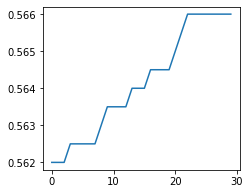

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_error, optimizer=Adadelta
------> epoch=30 loss=0.4480937933921814, accuracy=0.5009999871253967
------> bias=-0.001283266581594944, weights=[1.1242108, -1.0255835, -0.7942458]


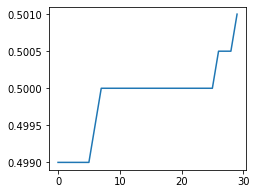

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Adadelta
------> epoch=30 loss=0.43674612951278685, accuracy=0.04100000113248825
------> bias=0.0017075386131182313, weights=[-0.73015416, -0.7610195, 0.0519063]


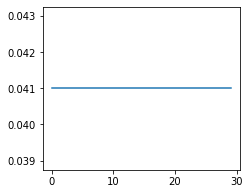

x_train: (2000, 3), y_trian: (2000,), loss=poisson, optimizer=Adadelta
------> epoch=30 loss=0.6039048576354981, accuracy=0.9760000109672546
------> bias=-0.0033538476563990116, weights=[0.2171028, -0.119448766, 0.1588923]


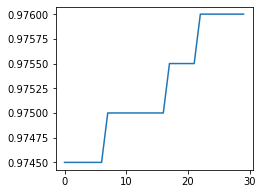

x_train: (2000, 3), y_trian: (2000,), loss=squared_hinge, optimizer=Adadelta
------> epoch=30 loss=1.5012993030548096, accuracy=0.4855000078678131
------> bias=-0.002325422130525112, weights=[0.76361704, 0.8475815, -1.1704894]


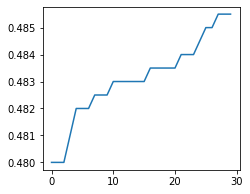

x_train: (2000, 3), y_trian: (2000,), loss=binary_crossentropy, optimizer=Adagrad
------> epoch=30 loss=0.49851619911193845, accuracy=0.8454999923706055
------> bias=-0.04822234809398651, weights=[1.2574996, 0.39501774, -0.5685207]


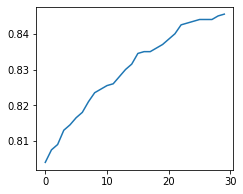

x_train: (2000, 3), y_trian: (2000,), loss=categorical_hinge, optimizer=Adagrad
------> epoch=30 loss=0.8622636137008667, accuracy=0.8725000023841858
------> bias=-0.0010034607257694006, weights=[0.12337449, 0.06450976, -0.05350229]


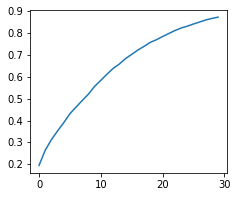

x_train: (2000, 3), y_trian: (2000,), loss=huber_loss, optimizer=Adagrad
------> epoch=30 loss=0.05710038930177688, accuracy=0.8460000157356262
------> bias=0.05999962240457535, weights=[-0.31456935, 0.082103506, 1.0722562]


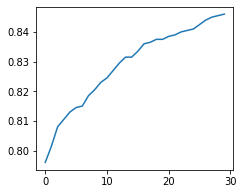

x_train: (2000, 3), y_trian: (2000,), loss=logcosh, optimizer=Adagrad
------> epoch=30 loss=0.3731941227912903, accuracy=0.0689999982714653
------> bias=0.08574266731739044, weights=[-0.17793608, -1.124012, -0.28149587]


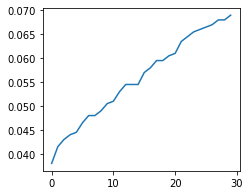

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_error, optimizer=Adagrad
------> epoch=30 loss=0.7371799125671387, accuracy=0.24449999630451202
------> bias=-0.07553694397211075, weights=[-0.939723, 0.37450993, 0.33133084]


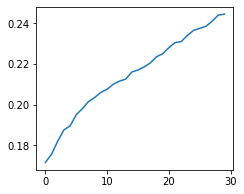

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Adagrad
------> epoch=30 loss=480453962.496, accuracy=0.02250000089406967
------> bias=-0.07872243225574493, weights=[-1.0385135, -0.06499052, -0.16337222]


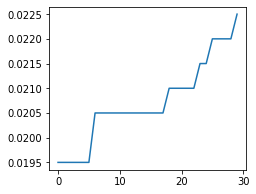

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_error, optimizer=Adagrad
------> epoch=30 loss=0.5620030016899109, accuracy=0.3294999897480011
------> bias=-0.058906082063913345, weights=[-0.20806217, 1.0458136, -0.37532127]


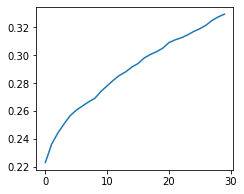

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Adagrad
------> epoch=30 loss=0.01966360729187727, accuracy=0.9380000233650208
------> bias=0.06531033664941788, weights=[0.5681267, 1.0233678, -0.09722754]


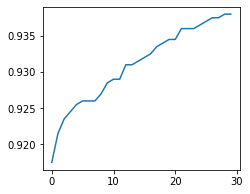

x_train: (2000, 3), y_trian: (2000,), loss=poisson, optimizer=Adagrad
------> epoch=30 loss=1.3784330215454101, accuracy=0.3244999945163727
------> bias=0.07635475695133209, weights=[0.5571144, -0.88840365, -0.71182114]


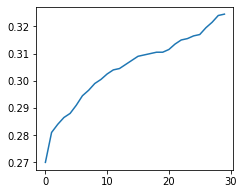

x_train: (2000, 3), y_trian: (2000,), loss=squared_hinge, optimizer=Adagrad
------> epoch=30 loss=0.5454774136543274, accuracy=0.9664999842643738
------> bias=-0.03464450687170029, weights=[0.7330675, 0.7167519, 0.0027135077]


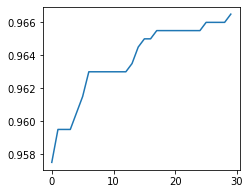

x_train: (2000, 3), y_trian: (2000,), loss=binary_crossentropy, optimizer=Adam
------> epoch=30 loss=0.05992117734253406, accuracy=0.9810000061988831
------> bias=-0.08339470624923706, weights=[1.0155996, 0.28480348, 0.1878182]


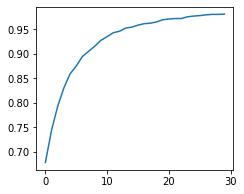

x_train: (2000, 3), y_trian: (2000,), loss=categorical_hinge, optimizer=Adam
------> epoch=30 loss=0.5273291339874268, accuracy=0.9750000238418579
------> bias=1.0640393495559692, weights=[0.16766936, 0.95079035, 1.6181184]


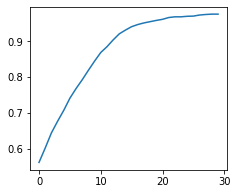

x_train: (2000, 3), y_trian: (2000,), loss=huber_loss, optimizer=Adam
------> epoch=30 loss=0.010140876799123361, accuracy=0.9704999923706055
------> bias=0.2090471386909485, weights=[0.14312494, 0.106573254, 1.2396725]


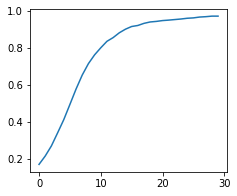

x_train: (2000, 3), y_trian: (2000,), loss=logcosh, optimizer=Adam
------> epoch=30 loss=0.004168760895729065, accuracy=0.9944999814033508
------> bias=0.3987962603569031, weights=[0.2830631, 0.28630662, 0.29450718]


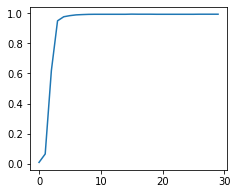

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_error, optimizer=Adam
------> epoch=30 loss=0.025514468029141427, accuracy=0.9854999780654907
------> bias=0.6787234544754028, weights=[0.7984934, 0.8132436, 0.20829184]


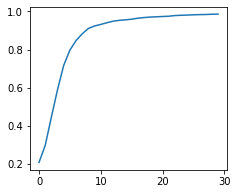

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Adam
------> epoch=30 loss=2539763.2306875, accuracy=0.9254999756813049
------> bias=-0.6026545166969299, weights=[0.40112075, 1.3767095, 0.20532502]


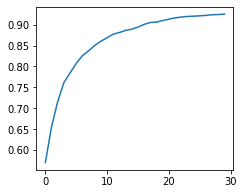

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_error, optimizer=Adam
------> epoch=30 loss=0.01758385059790453, accuracy=0.9750000238418579
------> bias=0.4238069951534271, weights=[0.12978654, 0.29326272, 1.1499996]


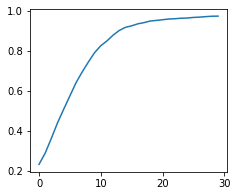

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Adam
------> epoch=30 loss=0.011166278962871728, accuracy=0.968999981880188
------> bias=-0.5930885076522827, weights=[1.4982373, 0.36412504, 0.060268845]


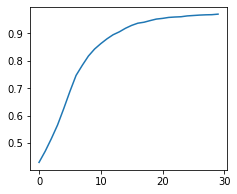

x_train: (2000, 3), y_trian: (2000,), loss=poisson, optimizer=Adam
------> epoch=30 loss=0.5389300518035889, accuracy=0.9735000133514404
------> bias=0.8568504452705383, weights=[0.05241635, 0.65314007, 0.3590758]


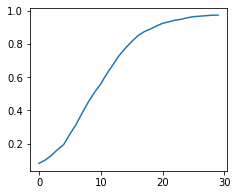

x_train: (2000, 3), y_trian: (2000,), loss=squared_hinge, optimizer=Adam
------> epoch=30 loss=0.5224979243278504, accuracy=0.9854999780654907
------> bias=-0.580224871635437, weights=[0.61881167, 0.19235, 0.35121742]


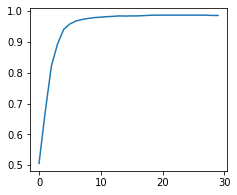

x_train: (2000, 3), y_trian: (2000,), loss=binary_crossentropy, optimizer=Adamax
------> epoch=1 loss=6.8268968586921694, accuracy=0.33500000834465027
------> bias=-0.025104939937591553, weights=[0.37368524, -1.7358861, -3.0442264]


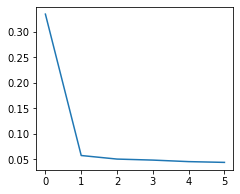

x_train: (2000, 3), y_trian: (2000,), loss=categorical_hinge, optimizer=Adamax
------> epoch=30 loss=0.8234376983642578, accuracy=0.6890000104904175
------> bias=-0.30046728253364563, weights=[0.83461934, 0.7453749, -0.7843502]


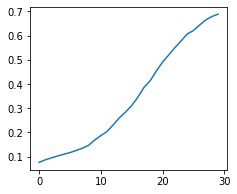

x_train: (2000, 3), y_trian: (2000,), loss=huber_loss, optimizer=Adamax
------> epoch=1 loss=0.3261511960029602, accuracy=0.3075000047683716
------> bias=0.0019919131882488728, weights=[0.9564859, -1.2752439, -2.2817848]


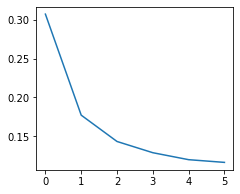

x_train: (2000, 3), y_trian: (2000,), loss=logcosh, optimizer=Adamax
------> epoch=1 loss=0.1337019898891449, accuracy=0.6804999709129333
------> bias=-0.00589005695655942, weights=[-0.5906763, -16.92511, 10.718172]


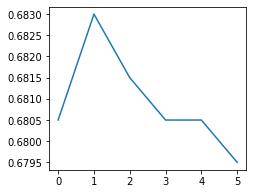

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_error, optimizer=Adamax
------> epoch=30 loss=0.18637337797880174, accuracy=0.8240000009536743
------> bias=-0.23613542318344116, weights=[1.5746857, 0.7864512, -0.8803856]


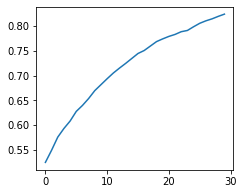

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Adamax
------> epoch=30 loss=592878.9848172608, accuracy=0.9929999709129333
------> bias=-0.07563929259777069, weights=[1.2198243, 1.5745059, 1.3226876]


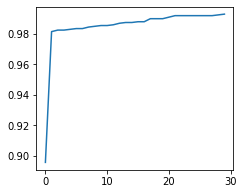

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_error, optimizer=Adamax
------> epoch=7 loss=0.0038523160205478986, accuracy=0.9955000281333923
------> bias=0.01654077135026455, weights=[1.1142561, 0.75525886, 1.6227443]


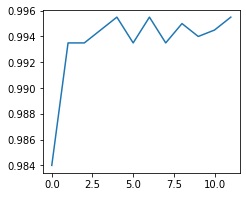

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Adamax
------> epoch=30 loss=0.04452845794707537, accuracy=0.8855000138282776
------> bias=-0.41201695799827576, weights=[1.7304039, 0.4152919, -0.5609022]


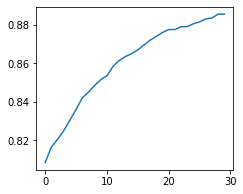

x_train: (2000, 3), y_trian: (2000,), loss=poisson, optimizer=Adamax
------> epoch=30 loss=0.5273940334320069, accuracy=0.9760000109672546
------> bias=-0.4952554702758789, weights=[0.6119022, -0.51090527, 0.9045373]


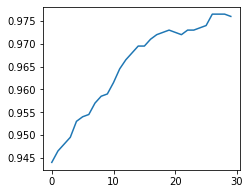

x_train: (2000, 3), y_trian: (2000,), loss=squared_hinge, optimizer=Adamax
------> epoch=30 loss=0.8949883375167846, accuracy=0.5864999890327454
------> bias=-0.8810884952545166, weights=[0.026103998, 0.86142385, -0.12876964]


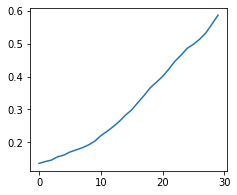

x_train: (2000, 3), y_trian: (2000,), loss=binary_crossentropy, optimizer=Ftrl
------> epoch=30 loss=1.7093723449707032, accuracy=0.3165000081062317
------> bias=0.06388629227876663, weights=[-0.34617648, 0.33707422, 0.08435464]


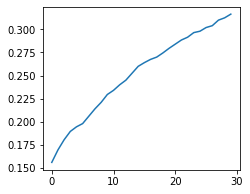

x_train: (2000, 3), y_trian: (2000,), loss=categorical_hinge, optimizer=Ftrl
------> epoch=30 loss=0.8278725805282593, accuracy=0.7570000290870667
------> bias=-0.03124123066663742, weights=[0.3071425, 0.11214289, -0.20079999]


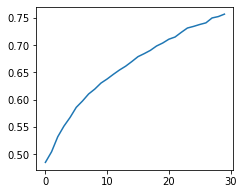

x_train: (2000, 3), y_trian: (2000,), loss=huber_loss, optimizer=Ftrl
------> epoch=30 loss=0.053635092675685885, accuracy=0.9884999990463257
------> bias=0.02878071926534176, weights=[0.024740163, 0.07007518, 0.083317526]


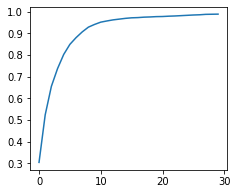

x_train: (2000, 3), y_trian: (2000,), loss=logcosh, optimizer=Ftrl
------> epoch=30 loss=0.06642308789491654, accuracy=0.8234999775886536
------> bias=0.04267179220914841, weights=[-0.070598654, 0.058115263, 0.19567452]


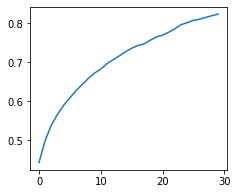

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_error, optimizer=Ftrl
------> epoch=30 loss=0.4289126009941101, accuracy=0.6165000200271606
------> bias=-0.01881769672036171, weights=[-0.18634124, 0.17727877, 0.21128628]


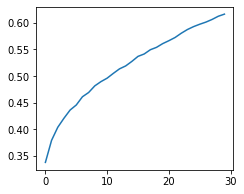

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Ftrl
------> epoch=30 loss=1716954.6340429687, accuracy=0.9944999814033508
------> bias=-0.044115252792835236, weights=[0.9387168, 0.72412235, 0.8464179]


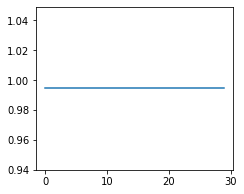

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_error, optimizer=Ftrl
------> epoch=30 loss=0.08202940165996551, accuracy=0.9944999814033508
------> bias=0.014660648070275784, weights=[0.070273794, 0.06710316, 0.070666395]


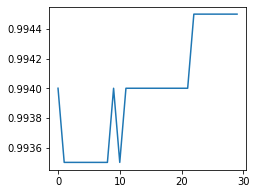

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Ftrl
------> epoch=30 loss=0.05670173251628876, accuracy=0.9599999785423279
------> bias=-0.024401191622018814, weights=[0.004949004, 0.07348391, 0.092209004]


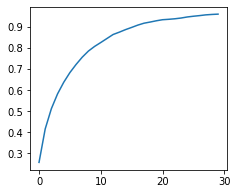

x_train: (2000, 3), y_trian: (2000,), loss=poisson, optimizer=Ftrl
------> epoch=30 loss=0.6420370297431945, accuracy=0.9940000176429749
------> bias=-0.06149725988507271, weights=[0.075146, 0.04703605, 0.094960704]


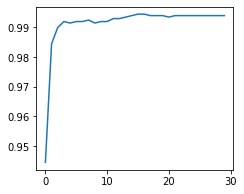

x_train: (2000, 3), y_trian: (2000,), loss=squared_hinge, optimizer=Ftrl
------> epoch=30 loss=0.8237107954025269, accuracy=0.987500011920929
------> bias=-0.07094080001115799, weights=[0.07297204, 0.073392734, 0.06734412]


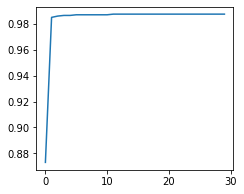

x_train: (2000, 3), y_trian: (2000,), loss=binary_crossentropy, optimizer=Nadam
------> epoch=30 loss=0.14518583381175995, accuracy=0.949999988079071
------> bias=-0.6876556873321533, weights=[0.7150445, 0.051948965, -0.04188953]


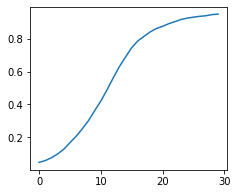

x_train: (2000, 3), y_trian: (2000,), loss=categorical_hinge, optimizer=Nadam
------> epoch=30 loss=0.5212716617584229, accuracy=0.9829999804496765
------> bias=1.0545405149459839, weights=[0.2625666, 0.94429266, 1.4281166]


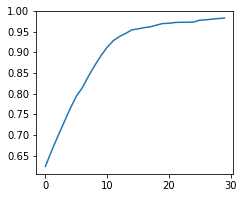

x_train: (2000, 3), y_trian: (2000,), loss=huber_loss, optimizer=Nadam
------> epoch=30 loss=0.0058219525571330455, accuracy=0.984499990940094
------> bias=0.8201209902763367, weights=[0.44267732, 0.97295195, 0.32240763]


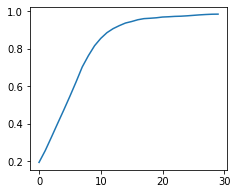

x_train: (2000, 3), y_trian: (2000,), loss=logcosh, optimizer=Nadam
------> epoch=30 loss=0.0032471420764923096, accuracy=0.9929999709129333
------> bias=0.23092485964298248, weights=[0.30658662, 0.25564155, 0.72781265]


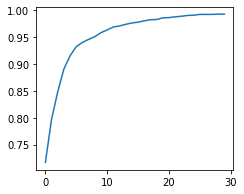

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_error, optimizer=Nadam
------> epoch=30 loss=0.012671657204627991, accuracy=0.9934999942779541
------> bias=0.6682282090187073, weights=[0.47335163, 0.70976156, 1.2241656]


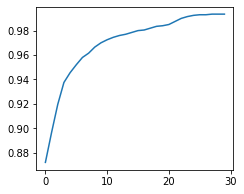

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=Nadam
------> epoch=30 loss=4383792.2185, accuracy=0.8734999895095825
------> bias=-0.8235622644424438, weights=[0.4367339, 1.5473131, 0.0027547197]


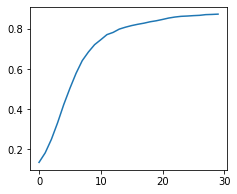

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_error, optimizer=Nadam
------> epoch=30 loss=0.010009392895997735, accuracy=0.9869999885559082
------> bias=0.7723734974861145, weights=[0.19676803, 0.52936447, 0.9336064]


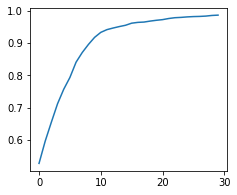

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=Nadam
------> epoch=30 loss=0.0048823268692940475, accuracy=0.9884999990463257
------> bias=-0.670345664024353, weights=[0.7348788, -0.17898785, 0.5340637]


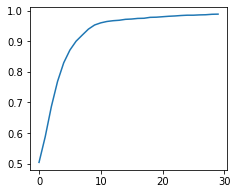

x_train: (2000, 3), y_trian: (2000,), loss=poisson, optimizer=Nadam
------> epoch=30 loss=0.5795281186103821, accuracy=0.9539999961853027
------> bias=0.38302740454673767, weights=[1.1185971, 0.25560862, -0.0679483]


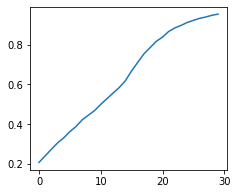

x_train: (2000, 3), y_trian: (2000,), loss=squared_hinge, optimizer=Nadam
------> epoch=30 loss=0.5216596179008484, accuracy=0.987500011920929
------> bias=-0.21585576236248016, weights=[0.23503082, 0.4803538, 0.68348587]


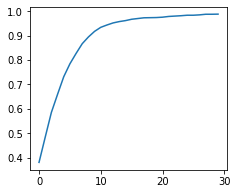

x_train: (2000, 3), y_trian: (2000,), loss=binary_crossentropy, optimizer=RMSprop
------> epoch=30 loss=0.016359283002559094, accuracy=0.9940000176429749
------> bias=0.08399378508329391, weights=[0.7737564, 0.3791005, 0.9305907]


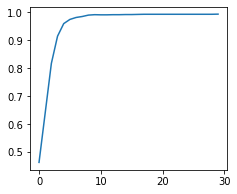

x_train: (2000, 3), y_trian: (2000,), loss=categorical_hinge, optimizer=RMSprop
------> epoch=30 loss=0.5374418005943299, accuracy=0.984000027179718
------> bias=0.6671870946884155, weights=[0.20850892, 0.14246549, 0.8031287]


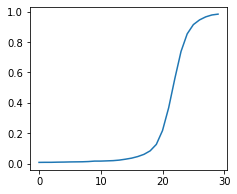

x_train: (2000, 3), y_trian: (2000,), loss=huber_loss, optimizer=RMSprop
------> epoch=30 loss=0.0020448645479191328, accuracy=0.9950000047683716
------> bias=0.4326627850532532, weights=[0.6036491, 0.4366636, 0.72954106]


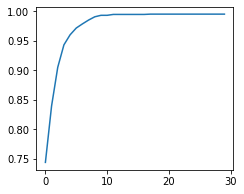

x_train: (2000, 3), y_trian: (2000,), loss=logcosh, optimizer=RMSprop
------> epoch=30 loss=0.001998520791530609, accuracy=0.9940000176429749
------> bias=0.21534903347492218, weights=[0.64628124, 0.3810586, 0.7774936]


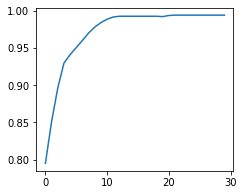

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_error, optimizer=RMSprop
------> epoch=30 loss=0.008537167057394981, accuracy=0.9925000071525574
------> bias=0.48906081914901733, weights=[1.1241467, 0.6402704, 1.0415992]


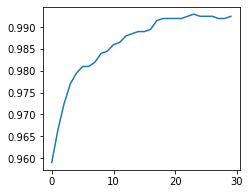

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=RMSprop
------> epoch=30 loss=1531915.9189389648, accuracy=0.9614999890327454
------> bias=-1.243701457977295, weights=[1.3590549, 1.5874017, 0.20666355]


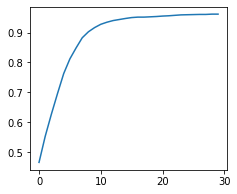

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_error, optimizer=RMSprop
------> epoch=30 loss=0.008637726342436508, accuracy=0.9890000224113464
------> bias=0.06362999975681305, weights=[1.0600893, 0.43017688, 0.4938274]


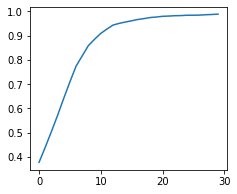

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=RMSprop
------> epoch=30 loss=0.0024257591343921376, accuracy=0.9929999709129333
------> bias=-0.22160528600215912, weights=[0.75381863, 0.29331744, 0.6612307]


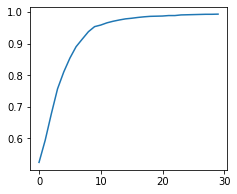

x_train: (2000, 3), y_trian: (2000,), loss=poisson, optimizer=RMSprop
------> epoch=30 loss=0.5091871216297149, accuracy=0.9934999942779541
------> bias=0.6857573986053467, weights=[0.48415342, 0.58599615, 1.0937049]


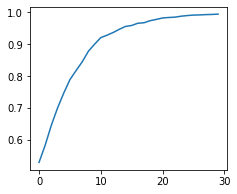

x_train: (2000, 3), y_trian: (2000,), loss=squared_hinge, optimizer=RMSprop
------> epoch=30 loss=0.5139948778152466, accuracy=0.9919999837875366
------> bias=-0.9852621555328369, weights=[1.6011776, -0.040380877, 1.444845]


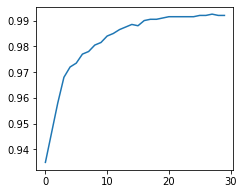

x_train: (2000, 3), y_trian: (2000,), loss=binary_crossentropy, optimizer=SGD
------> epoch=30 loss=0.01693020350462757, accuracy=0.9950000047683716
------> bias=0.10789410024881363, weights=[0.67712003, 0.4162925, 0.8191982]


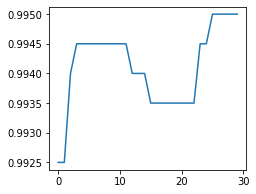

x_train: (2000, 3), y_trian: (2000,), loss=categorical_hinge, optimizer=SGD
------> epoch=30 loss=0.5154641971588135, accuracy=0.9890000224113464
------> bias=-0.08114499598741531, weights=[1.3272008, -0.35871384, 1.2033097]


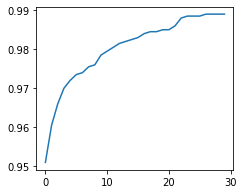

x_train: (2000, 3), y_trian: (2000,), loss=huber_loss, optimizer=SGD
------> epoch=30 loss=0.003423258845228702, accuracy=0.9925000071525574
------> bias=0.011535334400832653, weights=[0.36538696, 0.10927487, 0.6783942]


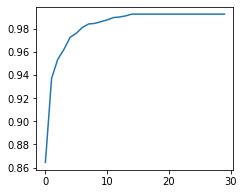

x_train: (2000, 3), y_trian: (2000,), loss=logcosh, optimizer=SGD
------> epoch=30 loss=0.005293266803026199, accuracy=0.9925000071525574
------> bias=0.02453041262924671, weights=[0.23561169, 0.058095522, 0.41915545]


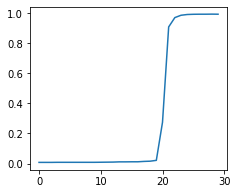

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_error, optimizer=SGD
------> epoch=30 loss=0.01850365561246872, accuracy=0.9835000038146973
------> bias=0.0710931047797203, weights=[0.84762573, 1.3757527, 0.69131553]


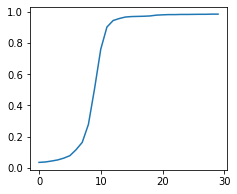

x_train: (2000, 3), y_trian: (2000,), loss=mean_absolute_percentage_error, optimizer=SGD
------> epoch=2 loss=1500002.65, accuracy=0.972000002861023
------> bias=-67164.8515625, weights=[215104.1, 244904.61, 41512.5]


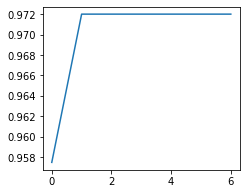

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_error, optimizer=SGD
------> epoch=30 loss=0.010453749155338301, accuracy=0.9854999780654907
------> bias=-0.07310471683740616, weights=[1.31267, 0.056517433, 0.5434095]


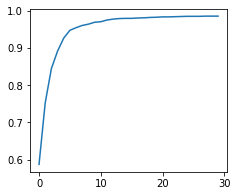

x_train: (2000, 3), y_trian: (2000,), loss=mean_squared_logarithmic_error, optimizer=SGD
------> epoch=30 loss=0.0030054121053544806, accuracy=0.9915000200271606
------> bias=0.041195232421159744, weights=[0.3180107, 0.3598772, 0.79188764]


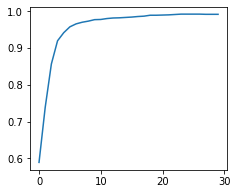

x_train: (2000, 3), y_trian: (2000,), loss=poisson, optimizer=SGD
------> epoch=30 loss=0.5080988123416901, accuracy=0.9959999918937683
------> bias=0.03022255003452301, weights=[0.70932657, 0.64145213, 1.1104221]


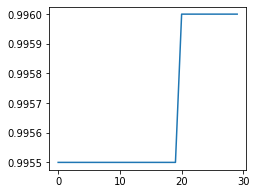

x_train: (2000, 3), y_trian: (2000,), loss=squared_hinge, optimizer=SGD
------> epoch=30 loss=0.5112605743408203, accuracy=0.9934999942779541
------> bias=-0.10140188783407211, weights=[0.87509537, 0.46419692, 0.68711853]


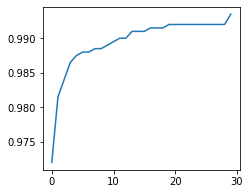



loss=poisson, optimizer=SGD is best(epoch=30, loss=0.5080988123416901, accuracy=0.9959999918937683)
-------------------------------------------






In [11]:
test(data[3], 30)